# **ASSIGNMENT 13** #

## ***1. GLASS DATA*** ##

File : glass.csv

In [337]:
# import the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')
palette_color = sns.color_palette('rainbow')

### **Importing data from file glass.csv**

In [338]:
# Reading the data from the file 'glass.csv'
glass_orig_data = pd.read_csv("glass.csv")
glass_orig_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### **EDA (Exploratory Data Analysis)**

In [339]:
glass_orig_data.shape

(214, 10)

#### *Descriptive Analysis* ####

In [340]:
glass_orig_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [341]:
glass_orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


#### *Checking for missing values* ####

In [342]:
# check for missing values
glass_orig_data.isna().sum() # The result shows that there are no missing values

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

#### *Checking for Null Values* ####

In [343]:
# Checking to see if there are any null values
# We can get this information using glass_orig_data.info() option as well
glass_orig_data.isnull().sum() # The result shows that there are no null values

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

#### *Checking for duplicates* ####

In [344]:
# Checking for Duplicate Values
glass_orig_data.duplicated()  # if any 2 rows has same values

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [345]:
# Count of duplicated rows
glass_orig_data[glass_orig_data.duplicated()].shape # We see that there is one duplicate

(1, 10)

In [346]:
# Print the duplicated rows. Since we have duplicates it will show us the record
glass_orig_data[glass_orig_data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [347]:
glass_orig_data[glass_orig_data.eq(1.52213).any(axis=1)] # We use a search command to find any repeated value '1.52213' for RI.

# As we can see below both records 38 and 39 are exactly the same and therefore record 39 was pointed out as a duplicate
# Since Record 38 is already present, we can go ahead and delete the record 39

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [348]:
# Dropping the duplicates as well as resetting the index
glass_orig_data = glass_orig_data.drop_duplicates().reset_index(drop=True) # Removing the duplicates by retraining on the first record, in this case 38

In [349]:
# Print the duplicated rows. Since we have duplicates it will show us the record
glass_orig_data[glass_orig_data.duplicated()]  # We don't find any duplicates now

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


#### *Checking the data structure* ####

In [350]:
glass_data = glass_orig_data.copy() # Creating a replicate 'glass_data' of the original DataFrame 'glass_orig_data'

In [351]:
# Data Structure
print(type(glass_data))
glass_data.shape

<class 'pandas.core.frame.DataFrame'>


(213, 10)

In [352]:
# Checking data types
glass_data.dtypes # check data types of all variables

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

#### **Visualizations** ####

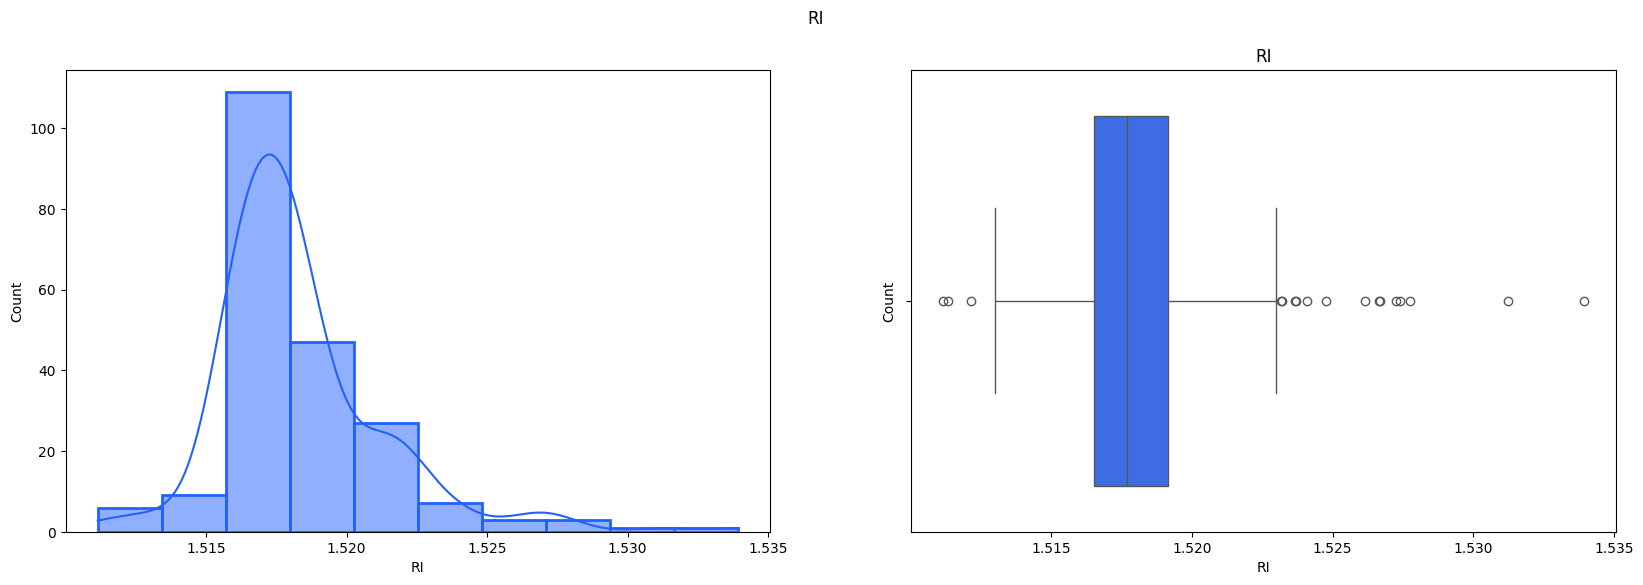

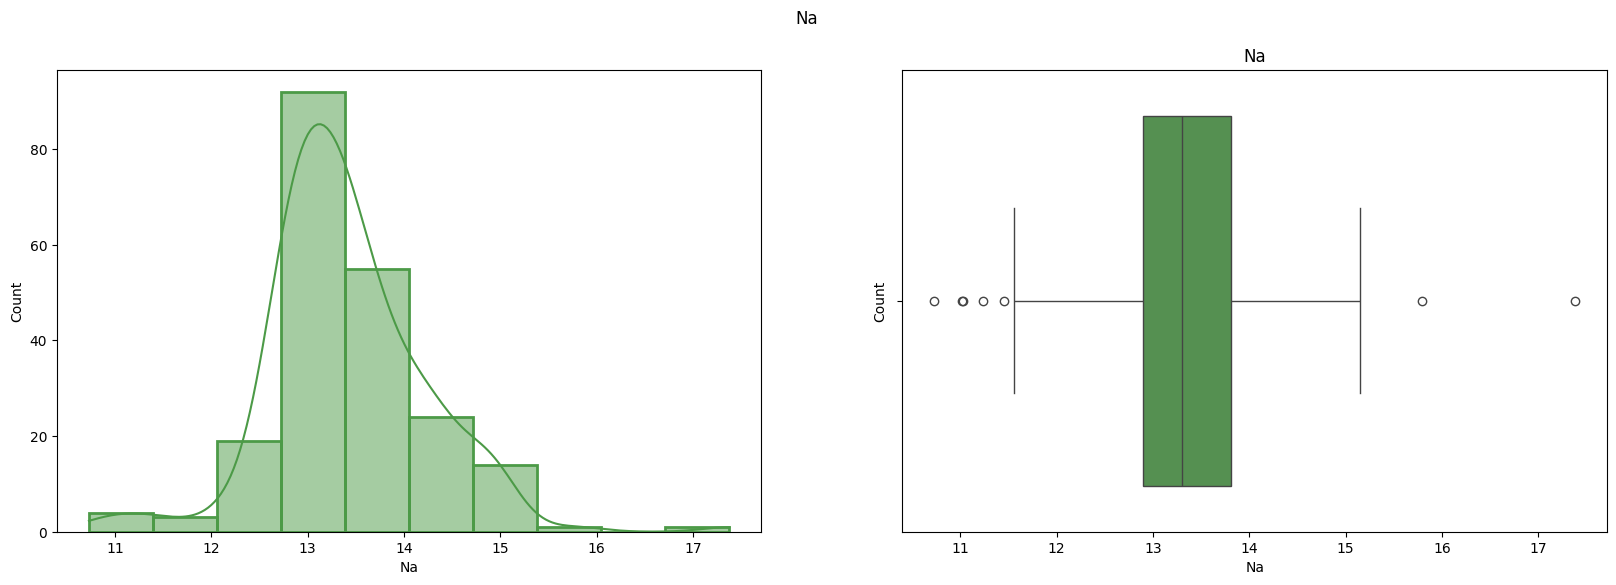

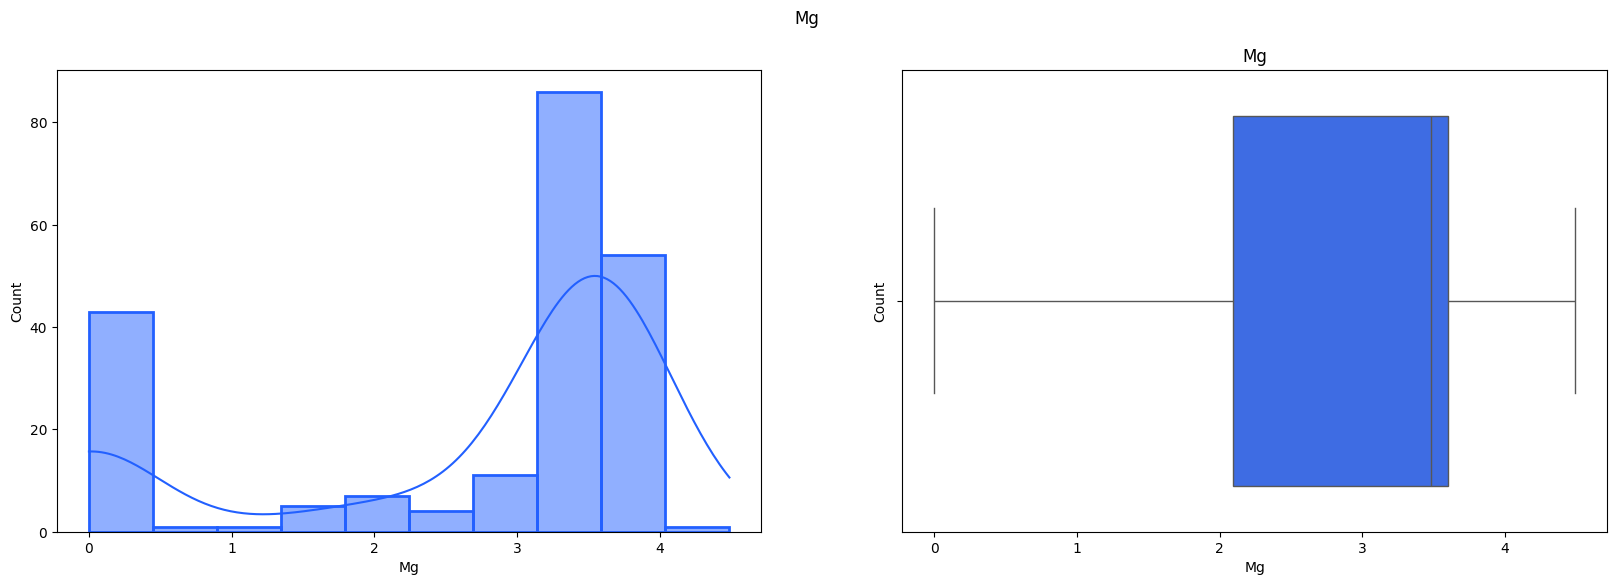

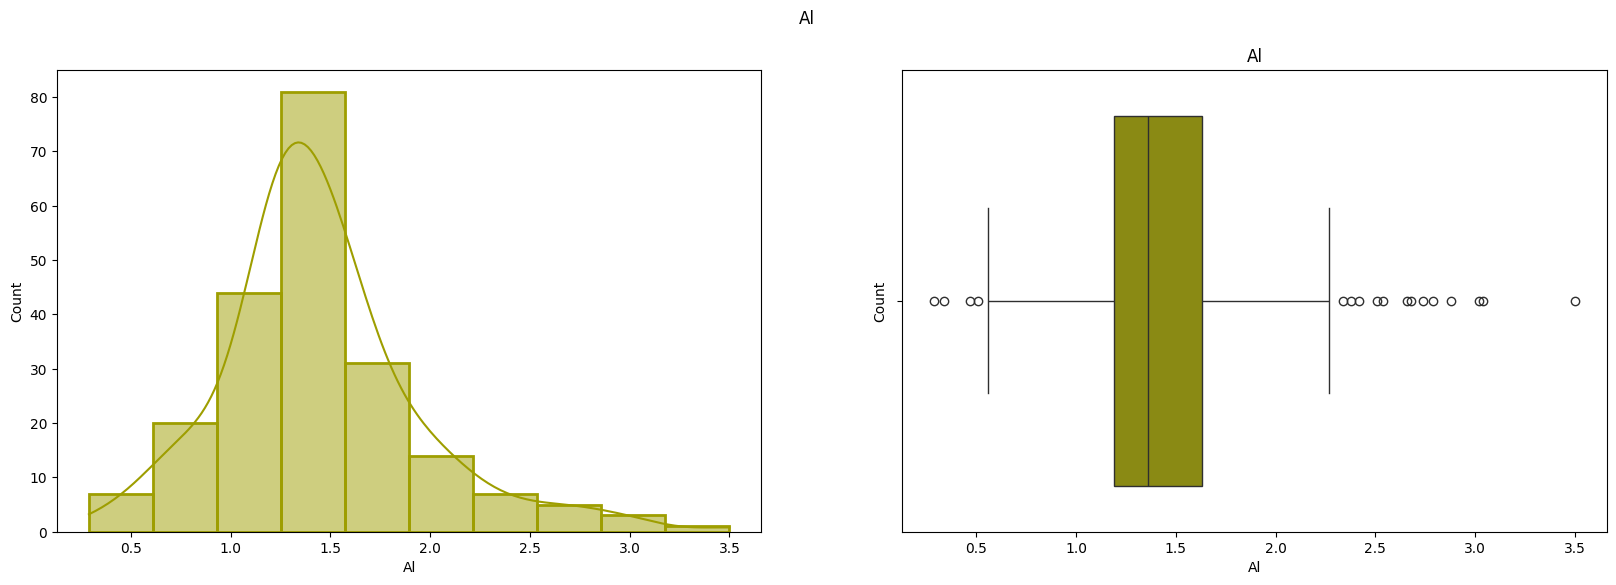

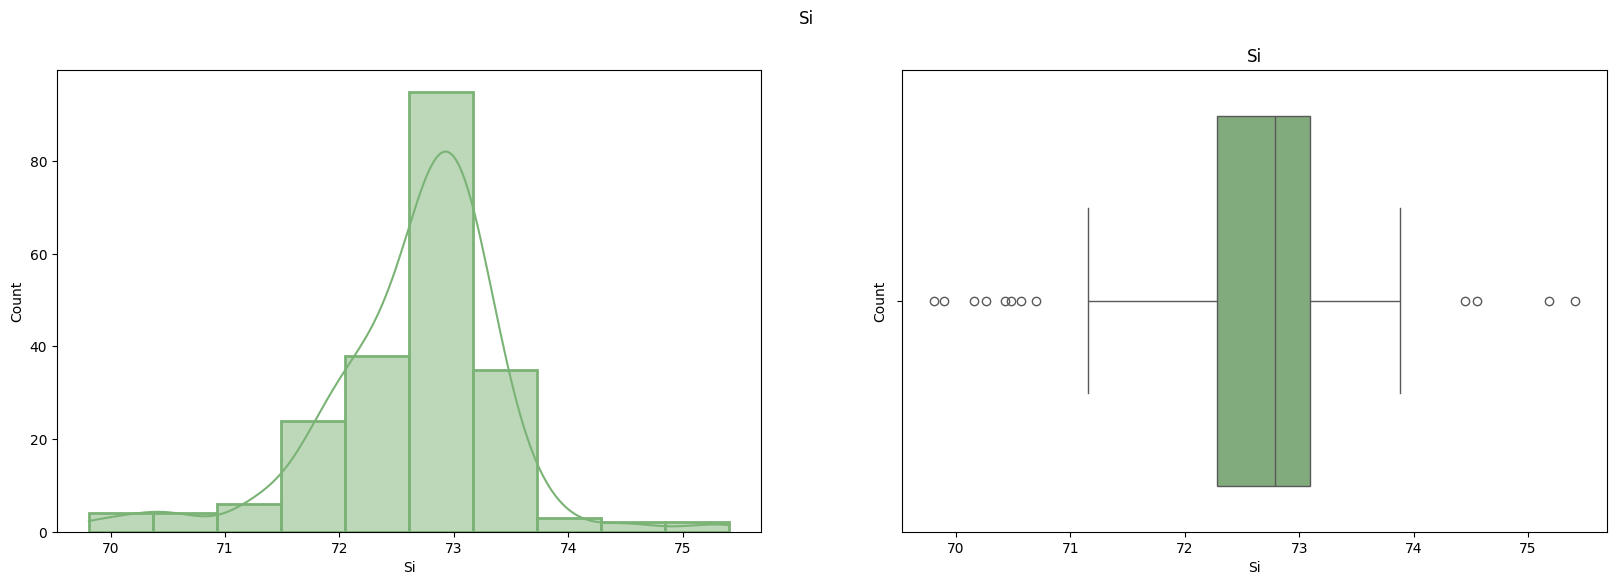

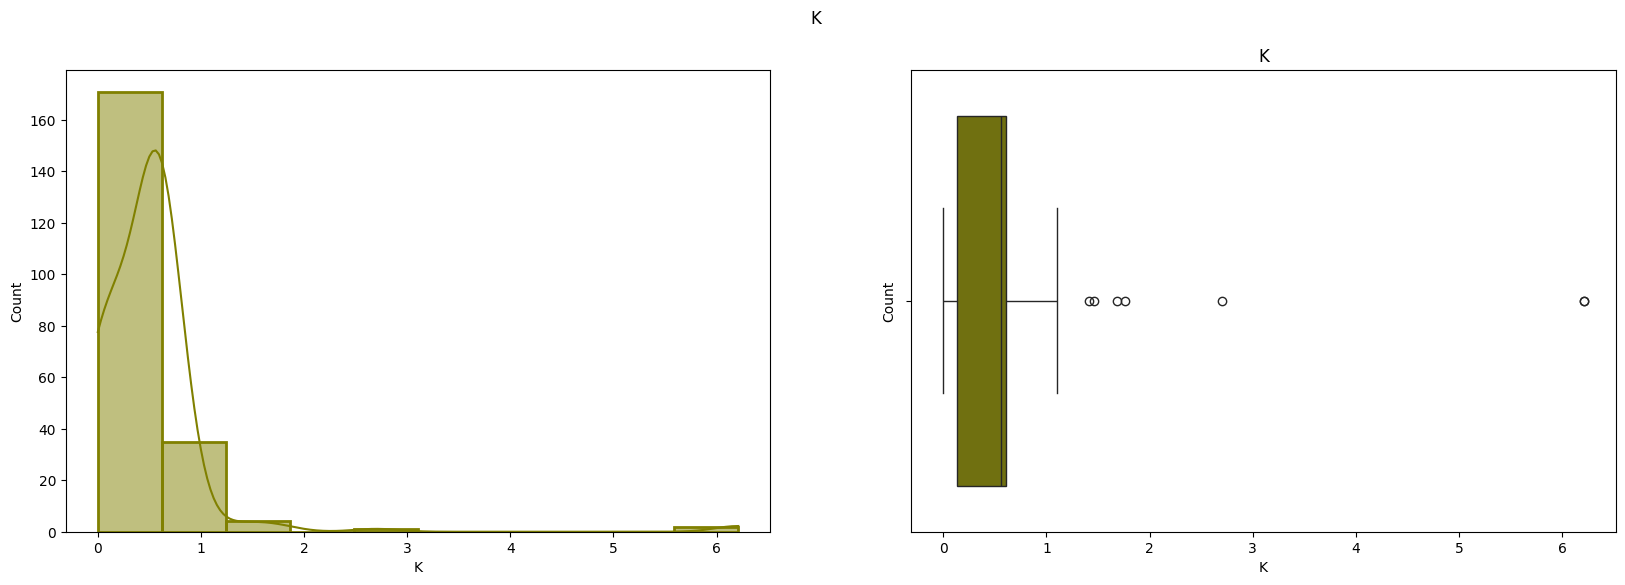

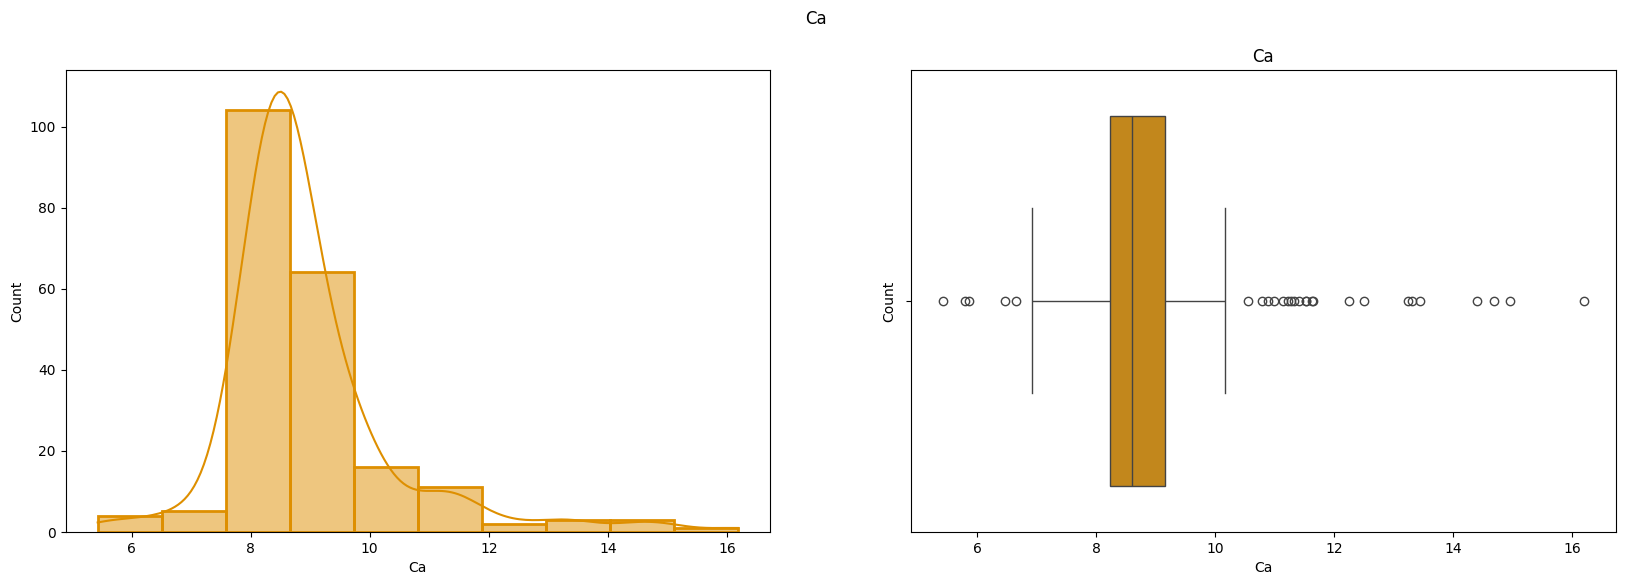

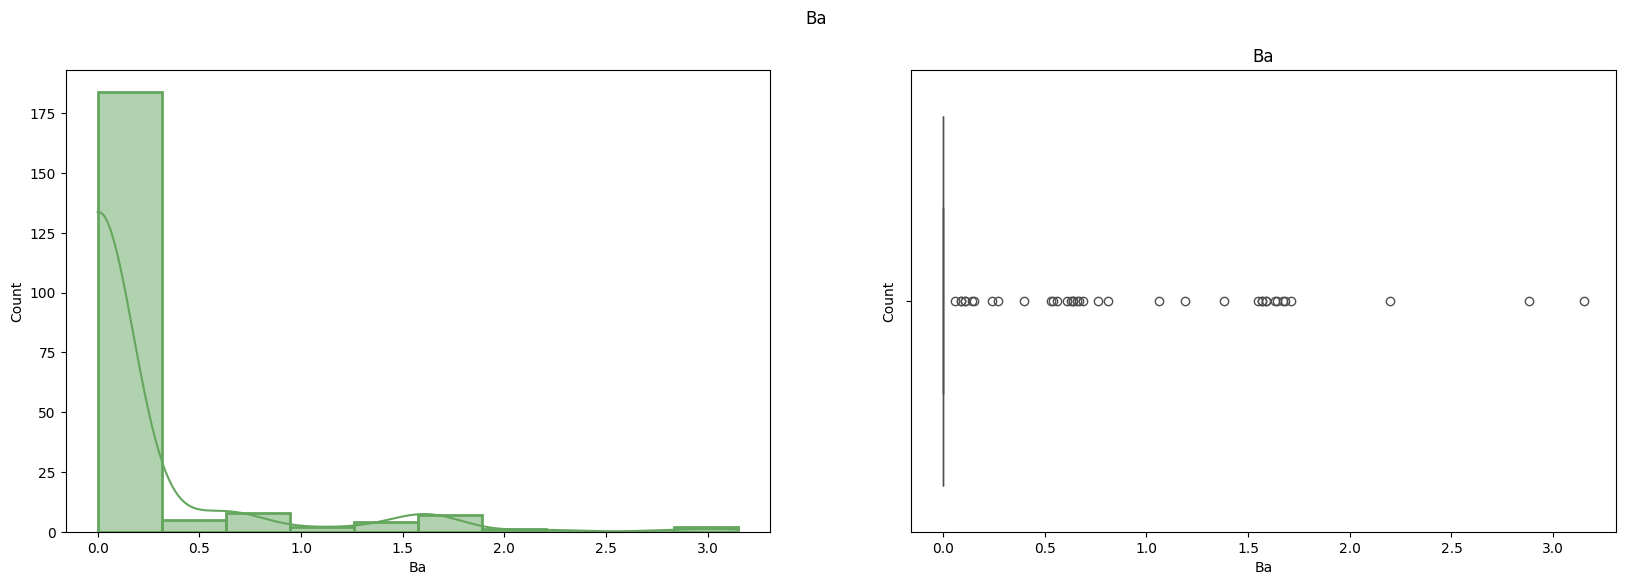

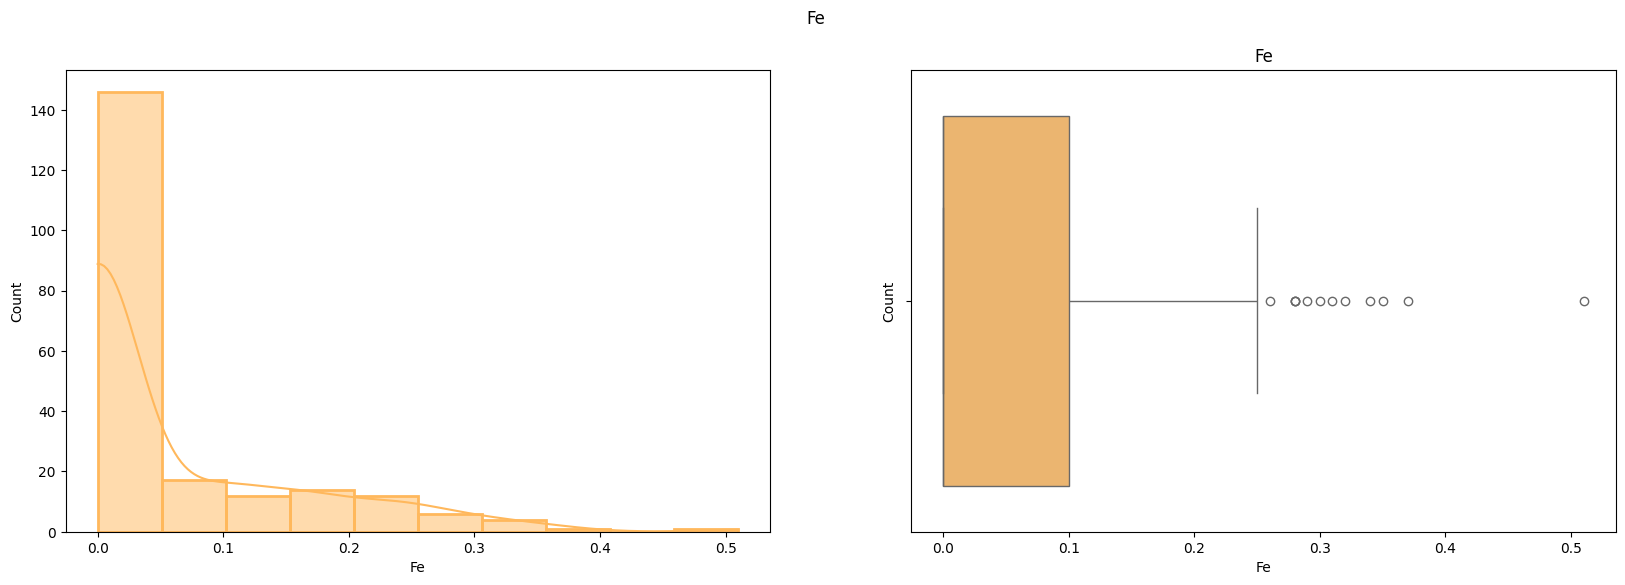

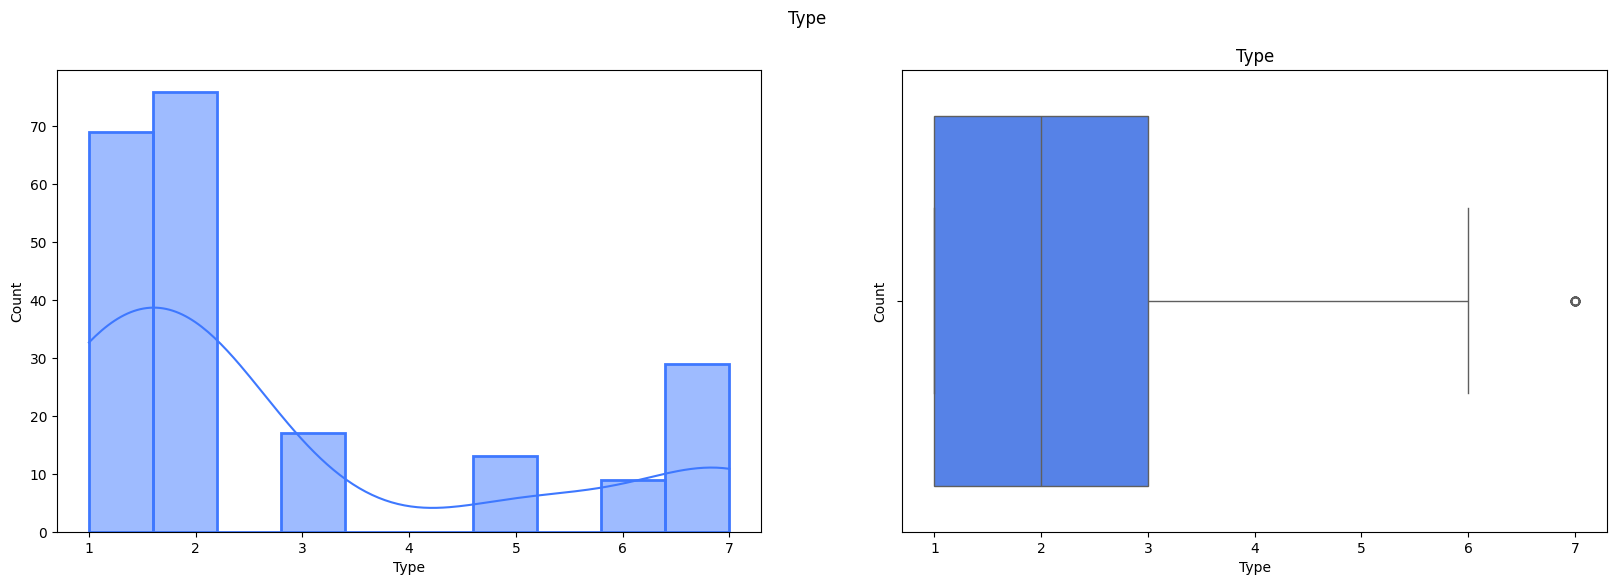

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

def plot_data(data,feature):

    # Seaborn
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)

    plt.subplot(1,2,2)
    sns.boxplot(data=data, x=feature, color=color)
    plt.ylabel('Count')
    plt.suptitle(feature)

for cols in glass_data.columns:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(glass_data,cols)
    plt.title(cols)

Some columns example 'Ba' and 'Ca' have too many outliers. We cannot remove all the outliers as that will effect the model.

### **Correlation Matrix**
Check for Assumption: Independent variables are independent of each other

In [354]:
glass_data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


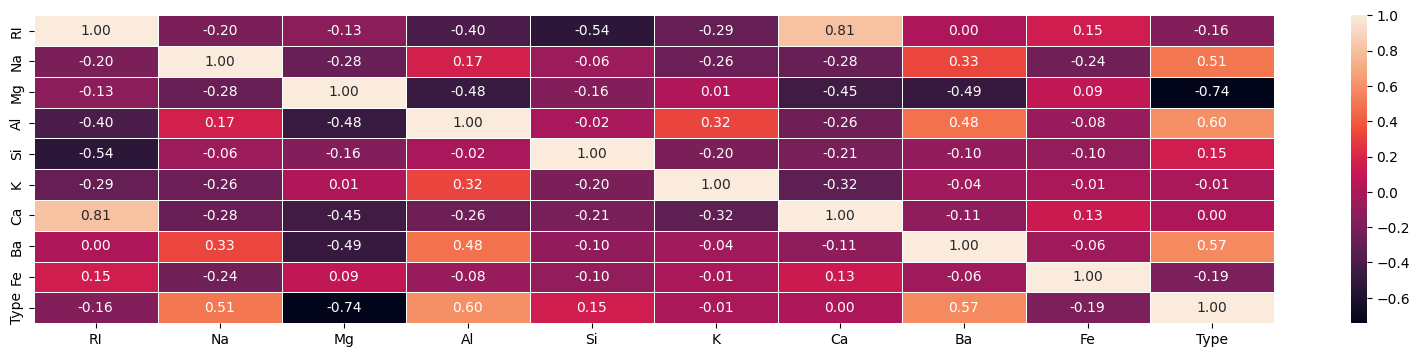

In [355]:
# Correlation Heatmap
f,ax = plt.subplots(figsize=(20,4))
sns.heatmap(glass_data.corr(), annot=True, linewidths =.5, fmt ='.2f',ax=ax)
plt.show()

#### **Positive Correlation:** ####
- We see a high positive correlation between elements Ca and Rl
- We see a positive correlation between Al and Type
- We see a positive correlation between Ba and Type
- We see a positive correlation between Na and Type

#### **Negative Correlation:** ####
- We see a high negative correlation between Mg and Type
- We see a negative correlation between Si and Rl
- We see a negative correlation between Mg and Ba
- We see a negative correlation between Mg and Al
- We see a negative correlation between Mg and Ca

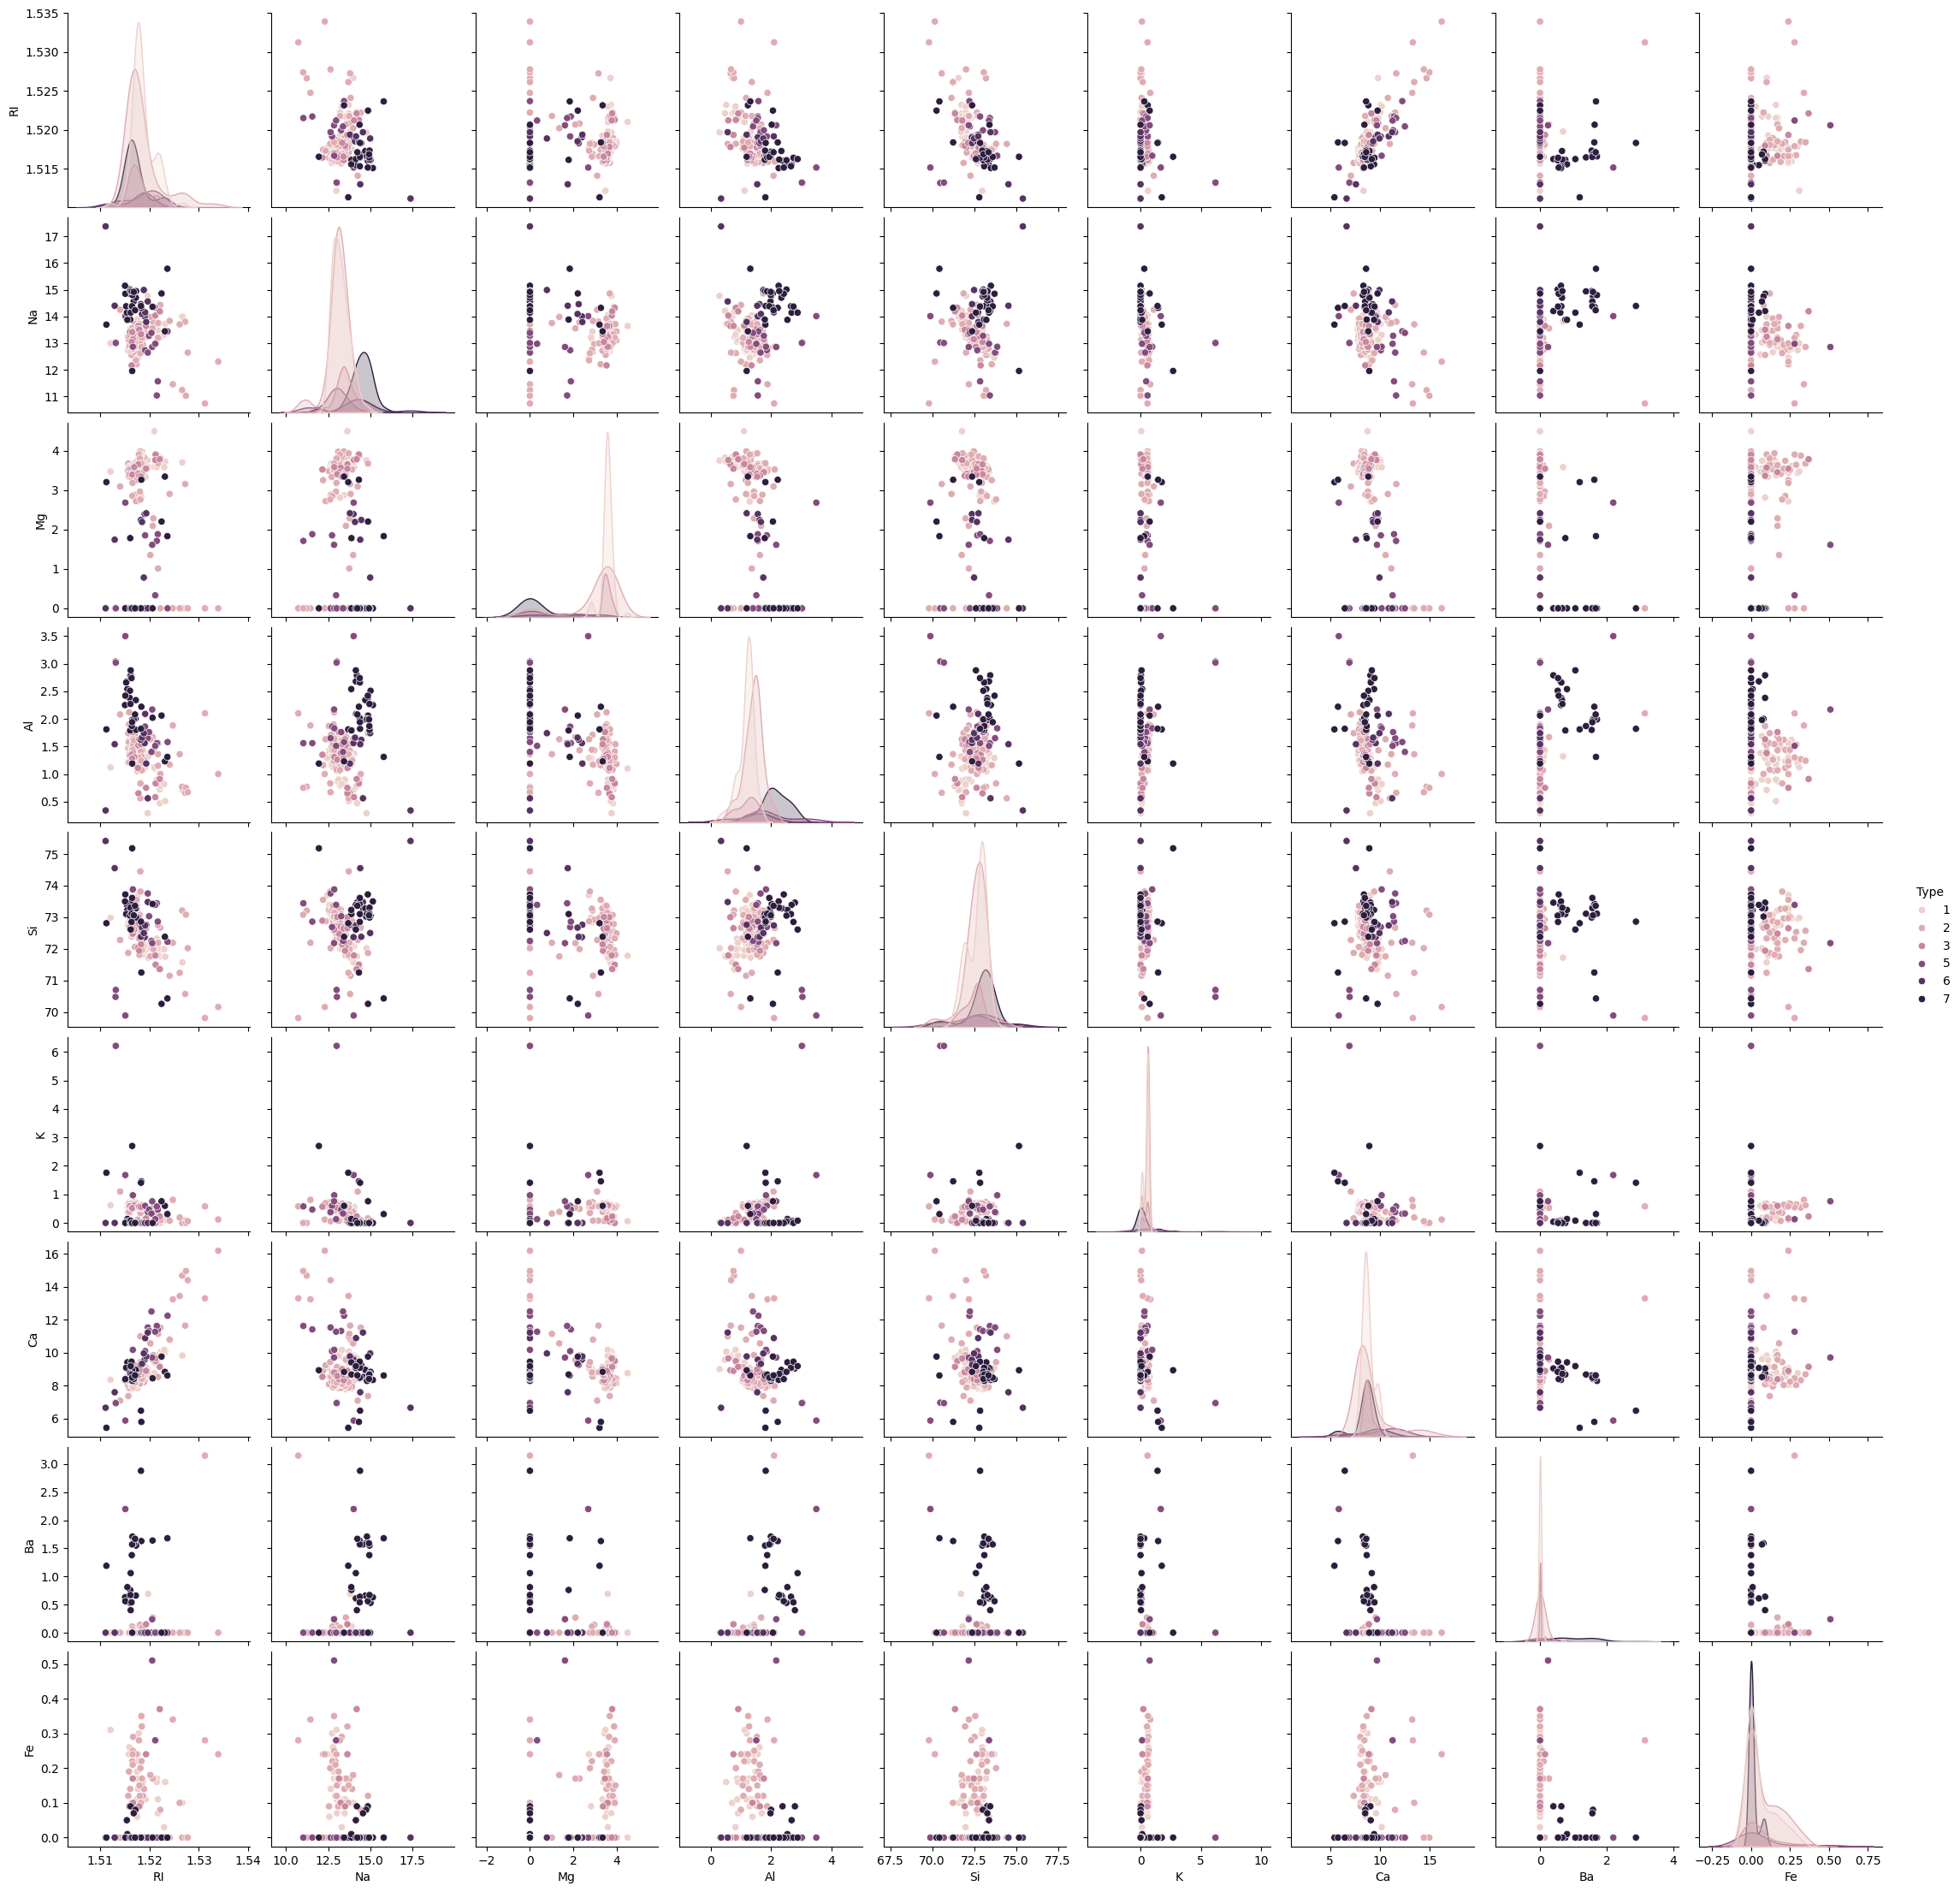

In [356]:
sns.pairplot(glass_data, hue='Type')

### **KNN Model Building** ###

In [357]:
x_glass = glass_data.iloc[:, 0:9]
y_glass = glass_data.iloc[:, 9]
x_glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [358]:
y_glass

0      1
1      1
2      1
3      1
4      1
      ..
208    7
209    7
210    7
211    7
212    7
Name: Type, Length: 213, dtype: int64

### **Splitting the data into train and test** ###

In [359]:
from sklearn.model_selection import train_test_split
x_train_glass, x_test_glass, y_train_glass, y_test_glass = train_test_split(x_glass,y_glass,test_size=0.2,random_state=0)

*Using the Default Option - n_neighbors = 5; metric = 'minkowski'*

In [360]:
# Creating model with default option i.e., n_neighbors = 5; metric = 'minkowski'
from sklearn.neighbors import KNeighborsClassifier
knn_glass_model_d = KNeighborsClassifier()
knn_glass_model_d.fit(x_train_glass,y_train_glass)

KNeighborsClassifier()

In [361]:
accuracy_glass_d = knn_glass_model_d.score(x_test_glass,y_test_glass)
accuracy_glass_d  # Accuracy based on default option is 0.5813953488372093

0.5813953488372093

*Calculating the ideal k value*

In [362]:
# Generally, k value should be the square root of the number of test records and it should be an odd number

# Calculating the square root of the number of test records
k_glass = np.sqrt(len(y_test_glass))

# See if k value is even then convert it to odd
k_glass = int(k_glass)
if k_glass % 2 == 0:
    k_glass += 1
k_glass = int(k_glass)
print(f"The calculated k value is {k_glass}")

# Here the calculated k value happens to be the same as the default value taken by the KNeighborsClassifier function

The calculated k value is 7


*Creation of a model using the calculated k value for n_neighbors i.e. n_neighbors = 7 and metric = 'euclidean'*

In [363]:
# Creating model based on the calculated k value i.e., n_neighbors = 7 but with default metric = 'minkowski'
from sklearn.neighbors import KNeighborsClassifier
knn_glass_model_0 = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski')
knn_glass_model_0.fit(x_train_glass,y_train_glass)

KNeighborsClassifier(n_neighbors=7)

In [364]:
accuracy_glass_0 = knn_glass_model_0.score(x_test_glass,y_test_glass)
accuracy_glass_0

# This is giving the same result as the default option

0.5581395348837209

*Creation of a model using the calculated k value for n_neighbors i.e. n_neighbors = 7 and metric = 'euclidean'*

In [365]:
# Creating model based on the calculated k value i.e., n_neighbors = 7 with a change that the metric = 'euclidean'
from sklearn.neighbors import KNeighborsClassifier
knn_glass_model_1 = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
knn_glass_model_1.fit(x_train_glass,y_train_glass)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [366]:
accuracy_glass_1 = knn_glass_model_1.score(x_test_glass,y_test_glass)
accuracy_glass_1

# This is giving the same result as the default distance option i.e., metric = 'minkowski'

0.5581395348837209

*Creation of a model using the calculated k value for n_neighbors i.e. n_neighbors = 7 and metric = 'manhattan'*

In [367]:
# Creating model based on the calculated k value i.e., n_neighbors = 7 with a change that the metric = 'manhattan'
from sklearn.neighbors import KNeighborsClassifier
knn_glass_model_2 = KNeighborsClassifier(n_neighbors = 7, metric = 'manhattan')
knn_glass_model_2.fit(x_train_glass,y_train_glass)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [368]:
accuracy_glass_2 = knn_glass_model_2.score(x_test_glass,y_test_glass)
accuracy_glass_2

# The metric = 'manhattan' is is giving a higher score when compared to metric = 'minkowski' and metric = 'euclidean'

0.5813953488372093

### **Trying the extract the optimal k value** ###

In [369]:
# Using the default metric for calculation of distance i.e., metric = 'minkowski'
k_glass_range_f = range(1,35)
metric = ['minkowski', 'euclidean', 'manhattan']
for kz in k_glass_range_f:
    for met in metric: 
        # The available metrics are Metric = {'minkowski', 'l1', 'jaccard', 'cosine', 'p', 'chebyshev', 'mahalanobis', 'seuclidean', 
        #'nan_euclidean', 'euclidean', 'correlation', 'manhattan', 'pyfunc', 'sokalsneath', 'infinity', 'yule', 'haversine', 'rogerstanimoto', 'sqeuclidean', 
        #'precomputed', 'cityblock', 'l2', 'hamming', 'canberra', 'dice', 'russellrao', 'braycurtis', 'sokalmichener'}
        
        knn_glass_model_f = KNeighborsClassifier(n_neighbors = kz, metric = met)
        knn_glass_model_f.fit(x_train_glass,y_train_glass)
        accuracy_glass_f = knn_glass_model_f.score(x_test_glass,y_test_glass)
        print(f'k = {kz} ; Metric = {met} ; Accuracy = {accuracy_glass_f}')

# We can see that the highest Metric is for 'manhattan' at k=3 and k=7, so lets go with k = 3 as the ideal k value

k = 1 ; Metric = minkowski ; Accuracy = 0.7441860465116279
k = 1 ; Metric = euclidean ; Accuracy = 0.7441860465116279
k = 1 ; Metric = manhattan ; Accuracy = 0.7209302325581395
k = 2 ; Metric = minkowski ; Accuracy = 0.627906976744186
k = 2 ; Metric = euclidean ; Accuracy = 0.627906976744186
k = 2 ; Metric = manhattan ; Accuracy = 0.6744186046511628
k = 3 ; Metric = minkowski ; Accuracy = 0.5813953488372093
k = 3 ; Metric = euclidean ; Accuracy = 0.5813953488372093
k = 3 ; Metric = manhattan ; Accuracy = 0.6744186046511628
k = 4 ; Metric = minkowski ; Accuracy = 0.5581395348837209
k = 4 ; Metric = euclidean ; Accuracy = 0.5581395348837209
k = 4 ; Metric = manhattan ; Accuracy = 0.6046511627906976
k = 5 ; Metric = minkowski ; Accuracy = 0.5813953488372093
k = 5 ; Metric = euclidean ; Accuracy = 0.5813953488372093
k = 5 ; Metric = manhattan ; Accuracy = 0.6046511627906976
k = 6 ; Metric = minkowski ; Accuracy = 0.5581395348837209
k = 6 ; Metric = euclidean ; Accuracy = 0.5581395348837209

In [370]:
# Using metric = 'manhattan', cross checking the value for k
k_glass_range_f = range(2,35)
k_glass_scores_f = []
for kz in k_glass_range_f:
    knn_glass_model_f = KNeighborsClassifier(n_neighbors = kz, metric = 'manhattan')
    knn_glass_model_f.fit(x_train_glass,y_train_glass)
    accuracy_glass_f = knn_glass_model_f.score(x_test_glass,y_test_glass)
    k_glass_scores_f.append(accuracy_glass_f)
    print(f'k = {kz} ; Metric = {met} ; Accuracy = {accuracy_glass_f}')

# We can see that the highest Metric is for 'manhattan' at k=3 and k=7, so lets go with k = 3 as the ideal k value

k = 2 ; Metric = manhattan ; Accuracy = 0.6744186046511628
k = 3 ; Metric = manhattan ; Accuracy = 0.6744186046511628
k = 4 ; Metric = manhattan ; Accuracy = 0.6046511627906976
k = 5 ; Metric = manhattan ; Accuracy = 0.6046511627906976
k = 6 ; Metric = manhattan ; Accuracy = 0.5813953488372093
k = 7 ; Metric = manhattan ; Accuracy = 0.5813953488372093
k = 8 ; Metric = manhattan ; Accuracy = 0.5813953488372093
k = 9 ; Metric = manhattan ; Accuracy = 0.5813953488372093
k = 10 ; Metric = manhattan ; Accuracy = 0.5813953488372093
k = 11 ; Metric = manhattan ; Accuracy = 0.5813953488372093
k = 12 ; Metric = manhattan ; Accuracy = 0.5813953488372093
k = 13 ; Metric = manhattan ; Accuracy = 0.5813953488372093
k = 14 ; Metric = manhattan ; Accuracy = 0.5813953488372093
k = 15 ; Metric = manhattan ; Accuracy = 0.5813953488372093
k = 16 ; Metric = manhattan ; Accuracy = 0.5813953488372093
k = 17 ; Metric = manhattan ; Accuracy = 0.5813953488372093
k = 18 ; Metric = manhattan ; Accuracy = 0.58139

Text(0, 0.5, 'Accuracy')

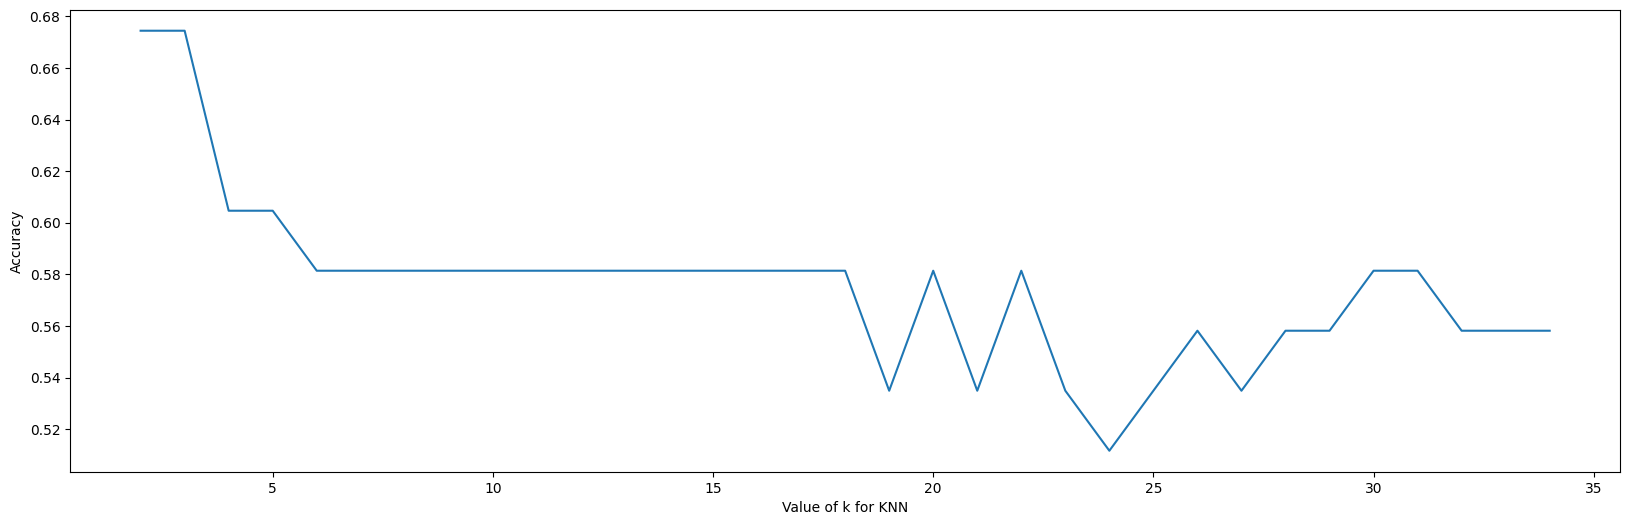

In [371]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(k_glass_range_f,k_glass_scores_f)
plt.xlabel("Value of k for KNN")
plt.ylabel("Accuracy")

# The graph shows the same i.e. the highest values are k = 2 and k = 3

#### **INFERENCE:** ####
- The highest score is received for k = 1 i.e., 0.7441860465116279 for both 'minkowski' and 'euclidean'.
  However, we cannot take k=1 as it indicates only 1 neighbour to assess the new data point. It may show high or low accuracy but we should ignore it.
- We can start with k values from 2 onwards, as seen in the second function. Thus k = 2 and k = 3, with the metric 'manhattan' is the showing the highest accuracy value of 0.6744186046511628.

We can consider k = 3 for n_neighbors as it gives the highest score.

In [372]:
final_glass_model = knn_glass_model_f

In [373]:
final_glass_model.predict([[1.5,14,3,3,70,0.5,8,0,0]])

array([2], dtype=int64)

In [374]:
final_glass_model.predict([[1.5, 14, 0, 2, 73, 0, 8, 1, 0], [1.5, 14, 2, 1, 72, 0, 9, 0, 0], [1.5, 12, 2, 1.8, 72, 0.6, 10, 0, 0], [1.5, 12, 3, 1.4, 72, 0.6, 8, 0, 0], [1.5, 13, 3, 1.5, 73, 0.6, 8, 0, 0]])

array([7, 1, 1, 2, 2], dtype=int64)

- The first data set is predicted to have a value of 7
- The second data set is predicted to have a value of 1
- The third data set is predicted to have a value of 1
- The fourth data set is predicted to have a value of 2
- The fifth data set is predicted to have a value of 2

### ***Using Grid Search for choosing the best value for k*** ###

In [375]:
knn_glass_model = KNeighborsClassifier(n_neighbors = 12)

In [376]:
knn_glass_model.fit(x_glass,y_glass)

KNeighborsClassifier(n_neighbors=12)

In [377]:
kfold = KFold(n_splits=8)
results = cross_val_score(knn_glass_model, x_glass, y_glass, cv = kfold)

In [378]:
results

array([0.51851852, 0.77777778, 0.88888889, 0.2962963 , 0.40740741,
       0.19230769, 0.        , 0.        ])

In [379]:
results.mean()

0.3851495726495726

#### *Grid Search for Algorithm Tuning* ####

In [380]:
n_neighbors_glass_1 = list(range(1,33))
parameters_glass_1 = {'n_neighbors' : n_neighbors_glass_1}

In [381]:
model_glass_alt_1 = KNeighborsClassifier()
grid_glass_alt_1 = GridSearchCV(estimator = model_glass_alt_1, param_grid = parameters_glass_1)
grid_glass_alt_1.fit(x_glass, y_glass)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [382]:
print(grid_glass_alt_1.best_score_)
print(grid_glass_alt_1.best_params_)

0.64828349944629
{'n_neighbors': 1}


Since we cannot take n_neighbor as 1, lets see the next best value

In [383]:
n_neighbors_glass_2 = list(range(2,33))
parameters_glass_2 = {'n_neighbors' : n_neighbors_glass_2}

In [384]:
model_glass_alt_2 = KNeighborsClassifier()
grid_glass_alt_2 = GridSearchCV(estimator = model_glass_alt_2, param_grid = parameters_glass_2)
grid_glass_alt_2.fit(x_glass, y_glass)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, ...]})

In [385]:
print(grid_glass_alt_2.best_score_)
print(grid_glass_alt_2.best_params_)

0.6292358803986711
{'n_neighbors': 2}


#### *Visualizing the CV results* ####

In [386]:
k_range_glass_cv = range(1, 57)
k_scores_glass_cv = []

# use iteration to caclulator different k in models
# then return the average accuracy based on the cross validation

for k in k_range_glass_cv:
    knn_model = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn_model, x_glass, y_glass, cv=4)
    k_scores_glass_cv.append(scores.mean())
    print(f'k = {k} ; Accuracy = {scores.mean()}')

k = 1 ; Accuracy = 0.6480607966457023
k = 2 ; Accuracy = 0.6243011879804332
k = 3 ; Accuracy = 0.6199336128581412


k = 4 ; Accuracy = 0.6199336128581412
k = 5 ; Accuracy = 0.6059573724668064
k = 6 ; Accuracy = 0.6481481481481481
k = 7 ; Accuracy = 0.6248252969951084
k = 8 ; Accuracy = 0.6152166317260657
k = 9 ; Accuracy = 0.6058700209643605
k = 10 ; Accuracy = 0.6104996505939903
k = 11 ; Accuracy = 0.6246505939902166
k = 12 ; Accuracy = 0.6435185185185185
k = 13 ; Accuracy = 0.6293675751222921
k = 14 ; Accuracy = 0.6481481481481481
k = 15 ; Accuracy = 0.6387141858839971
k = 16 ; Accuracy = 0.6387141858839971
k = 17 ; Accuracy = 0.6385394828791054
k = 18 ; Accuracy = 0.6434311670160726
k = 19 ; Accuracy = 0.6434311670160726
k = 20 ; Accuracy = 0.6387141858839971
k = 21 ; Accuracy = 0.6198462613556952
k = 22 ; Accuracy = 0.6198462613556953
k = 23 ; Accuracy = 0.6151292802236199
k = 24 ; Accuracy = 0.6291928721174004
k = 25 ; Accuracy = 0.6103249475890985
k = 26 ; Accuracy = 0.624475890985325
k = 27 ; Accuracy = 0.6197589098532494
k = 28 ; Accuracy = 0.615041928721174
k = 29 ; Accuracy = 0.61032494758

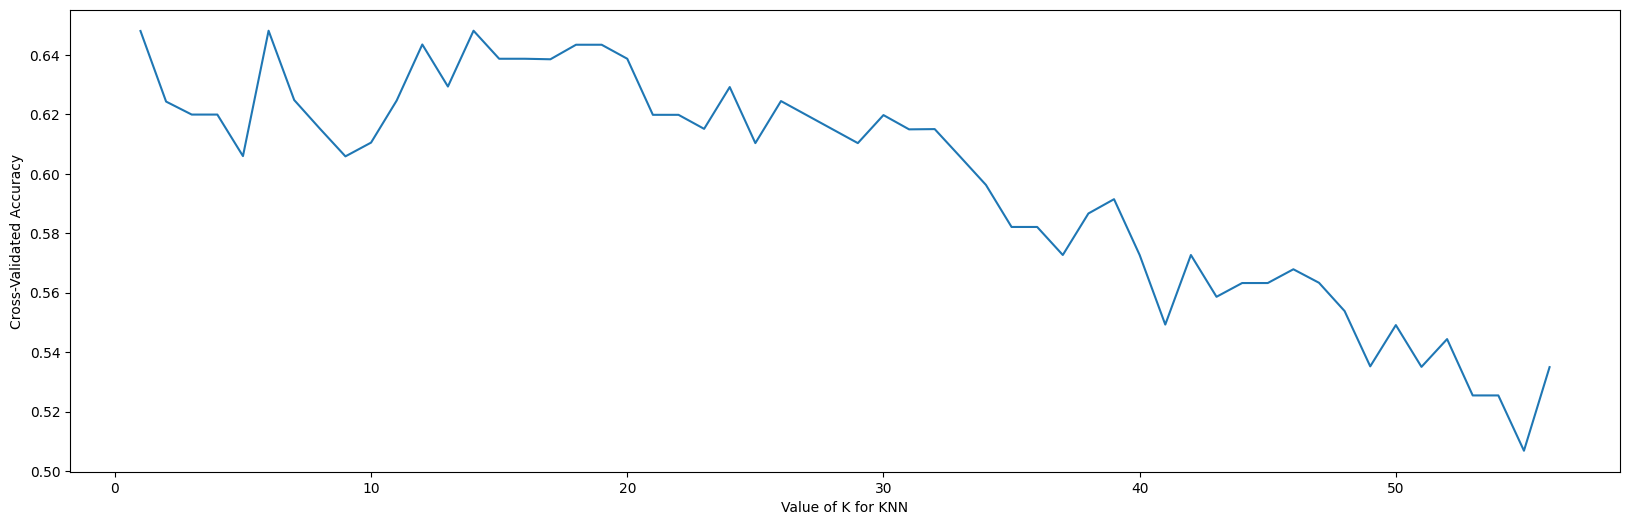

In [387]:
plt.figure(figsize=(20,6))
plt.plot(k_range_glass_cv, k_scores_glass_cv)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [388]:
glass_accuracy = pd.DataFrame({'Value of k' : k_range_glass_cv, 'Accuracy' : k_scores_glass_cv})
glass_accuracy.head()

,Value of k,Accuracy
0,1,0.648061
1,2,0.624301
2,3,0.619934
3,4,0.619934
4,5,0.605957


In [389]:
glass_accuracy.sort_values('Accuracy', ascending = False).head()

# Based on this we can see that the k values are highest for k = 6 and k = 14

,Value of k,Accuracy
5,6,0.648148
13,14,0.648148
0,1,0.648061
11,12,0.643519
18,19,0.643431


In [390]:
knn_fmodel_glass = KNeighborsClassifier(n_neighbors = 6)
knn_fmodel_glass.fit(x_train_glass,y_train_glass)

KNeighborsClassifier(n_neighbors=6)

In [391]:
knn_fmodel_glass.predict([[1.5, 14, 0, 2, 73, 0, 8, 1, 0], [1.5, 14, 2, 1, 72, 0, 9, 0, 0], [1.5, 12, 2, 1.8, 72, 0.6, 10, 0, 0], [1.5, 12, 3, 1.4, 72, 0.6, 8, 0, 0], [1.5, 13, 3, 1.5, 73, 0.6, 8, 0, 0]])

array([7, 6, 2, 2, 2], dtype=int64)

- The first data set is predicted to have a value of 7
- The second data set is predicted to have a value of 6
- The third data set is predicted to have a value of 2
- The fourth data set is predicted to have a value of 2
- The fifth data set is predicted to have a value of 2

## ***2. ZOO DATA*** ##

File : Zoo.csv

In [392]:
# import the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
palette_color = sns.color_palette('rainbow')

### **Importing data from file Zoo.csv** ###

In [393]:
# Reading the data from the file 'Zoo.csv'
zoo_orig_data = pd.read_csv("Zoo.csv")
zoo_orig_data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [394]:
class_data = pd.read_csv("class.csv")
class_data.head()

,Class_Number,Count_Animal_Species,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, wolf, bear, boar, buffalo,..."
1,2,20,Bird,"wren, vulture, swan, sparrow, skua, skimmer, r..."
2,3,5,Reptile,"tuatara, tortoise, slowworm, seasnake, pitviper"
3,4,13,Fish,"tuna, stingray, bass, sole, seahorse, piranha,..."
4,5,4,Amphibian,"toad, newt, frog, frog"


### **EDA (Exploratory Data Analysis)** ###

In [395]:
zoo_orig_data.shape

(101, 18)

#### *Descriptive Analysis* ####

In [396]:
zoo_orig_data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [397]:
zoo_orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


#### *Checking for missing values* ####

In [398]:
# check for missing values
zoo_orig_data.isna().sum() # The result shows that there are no missing values

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

#### *Checking for Null Values* ####

In [399]:
# Checking to see if there are any null values
# We can get this information using zoo_orig_data.info() option as well
zoo_orig_data.isnull().sum() # The result shows that there are no null values

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

#### *Checking for duplicates* ####

In [400]:
# Checking for Duplicate Values
zoo_orig_data.duplicated()  # if any 2 rows has same values

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [401]:
# Count of duplicated rows
zoo_orig_data[zoo_orig_data.duplicated()].shape # We see that there are no duplicates

(0, 18)

In [402]:
# Print the duplicated rows. Since we have duplicates it will show us the record
zoo_orig_data[zoo_orig_data.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


#### *Checking the data structure* ####

In [403]:
zoo_data = zoo_orig_data.copy() # Creating a replicate 'zoo_data' of the original DataFrame 'zoo_orig_data'

In [404]:
# Joining datasets along the class number column present in both datasets
zoo_data_compre = zoo_data.merge(class_data,how='left',left_on='type',right_on='Class_Number')
zoo_data_compre.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,type,Class_Number,Count_Animal_Species,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, wolf, bear, boar, buffalo,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, wolf, bear, boar, buffalo,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"tuna, stingray, bass, sole, seahorse, piranha,..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, wolf, bear, boar, buffalo,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, wolf, bear, boar, buffalo,..."


In [405]:
# Data Structure
print(type(zoo_data))
zoo_data.shape

<class 'pandas.core.frame.DataFrame'>


(101, 18)

In [406]:
# Checking data types
zoo_data.dtypes # check data types of all variables

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [407]:
# Checking data types
zoo_data_compre.dtypes # check data types of all variables

animal name             object
hair                     int64
feathers                 int64
eggs                     int64
milk                     int64
airborne                 int64
aquatic                  int64
predator                 int64
toothed                  int64
backbone                 int64
breathes                 int64
venomous                 int64
fins                     int64
legs                     int64
tail                     int64
domestic                 int64
catsize                  int64
type                     int64
Class_Number             int64
Count_Animal_Species     int64
Class_Type              object
Animal_Names            object
dtype: object

#### **Visualizations** ####

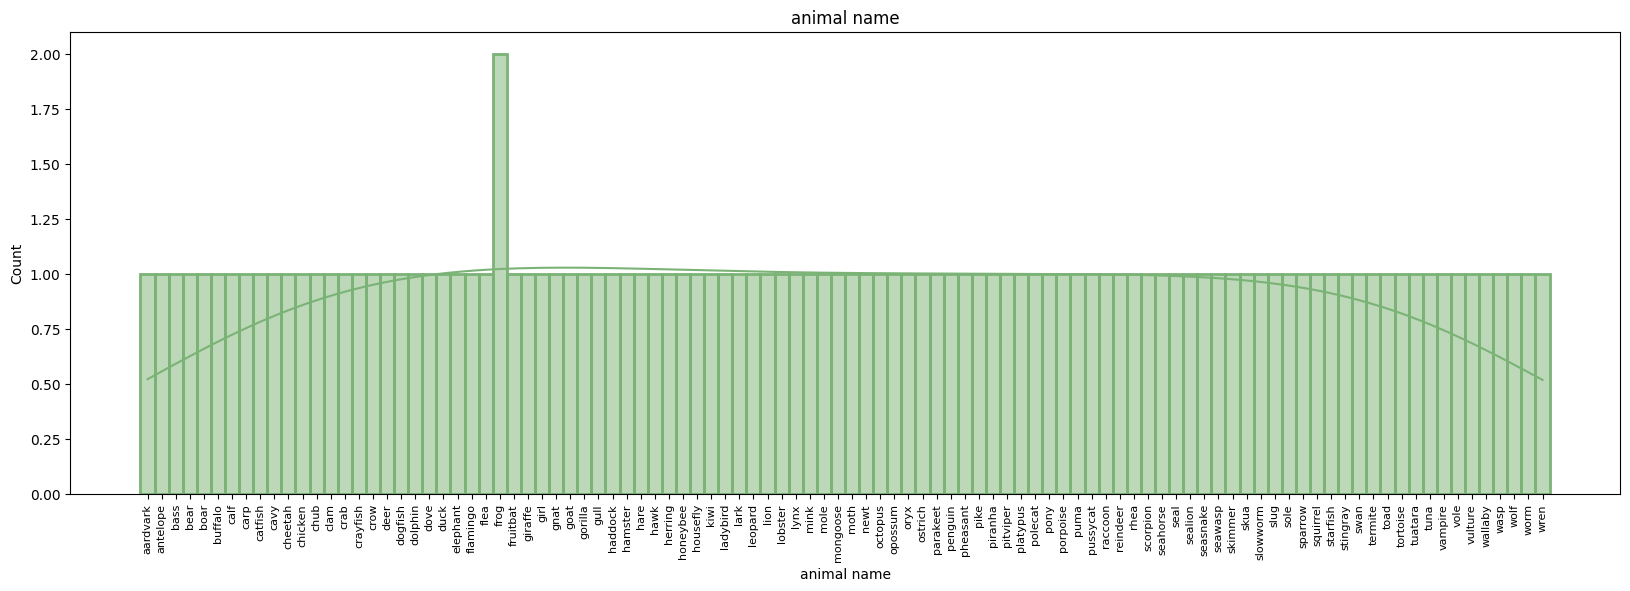

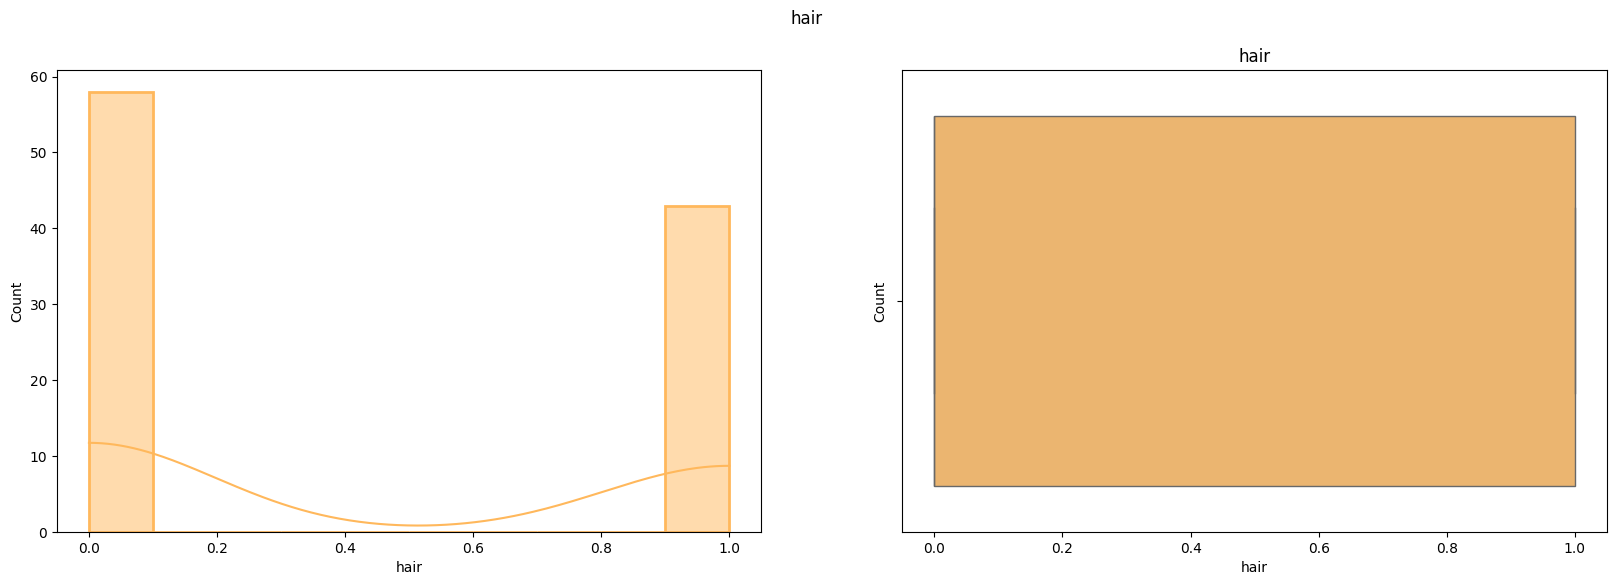

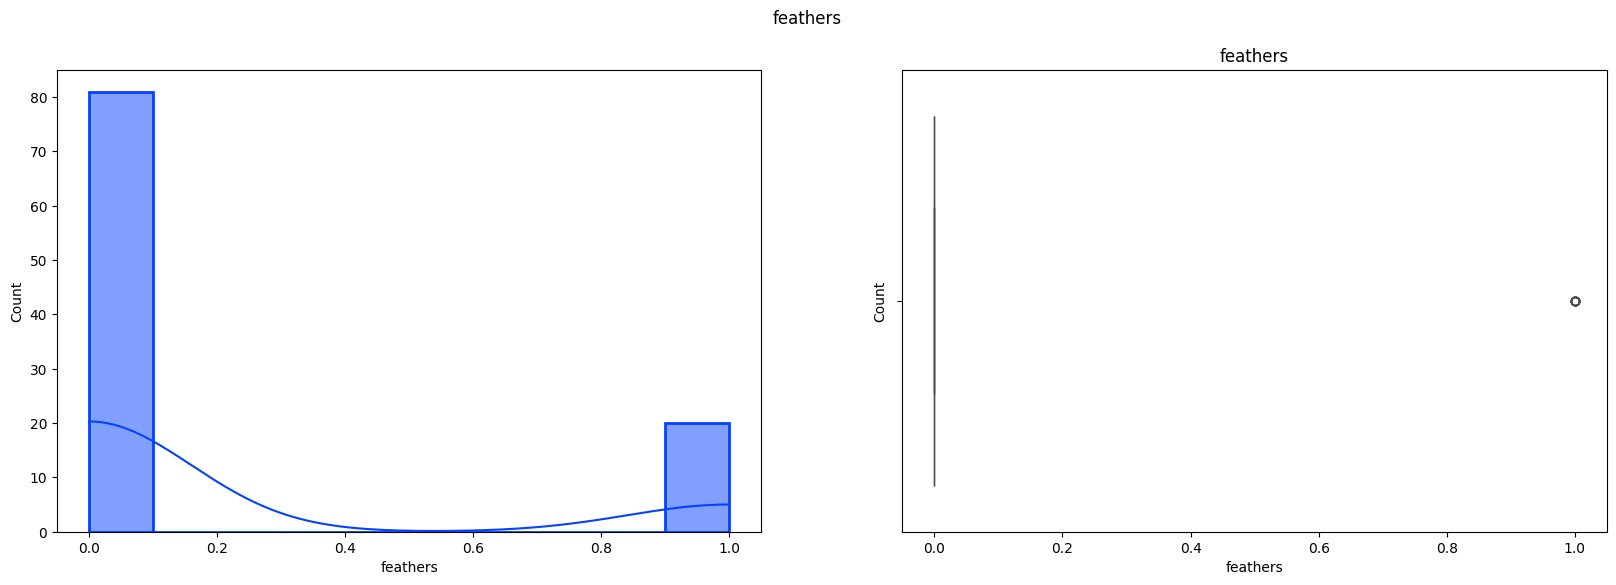

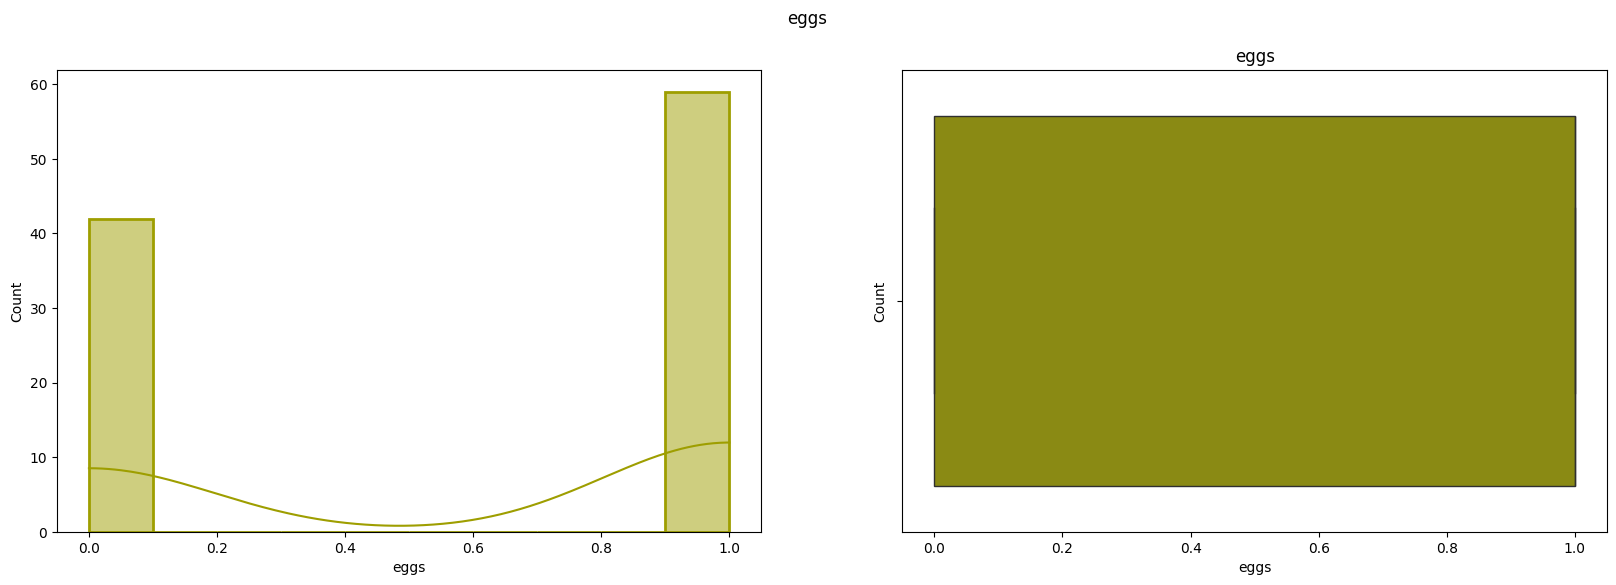

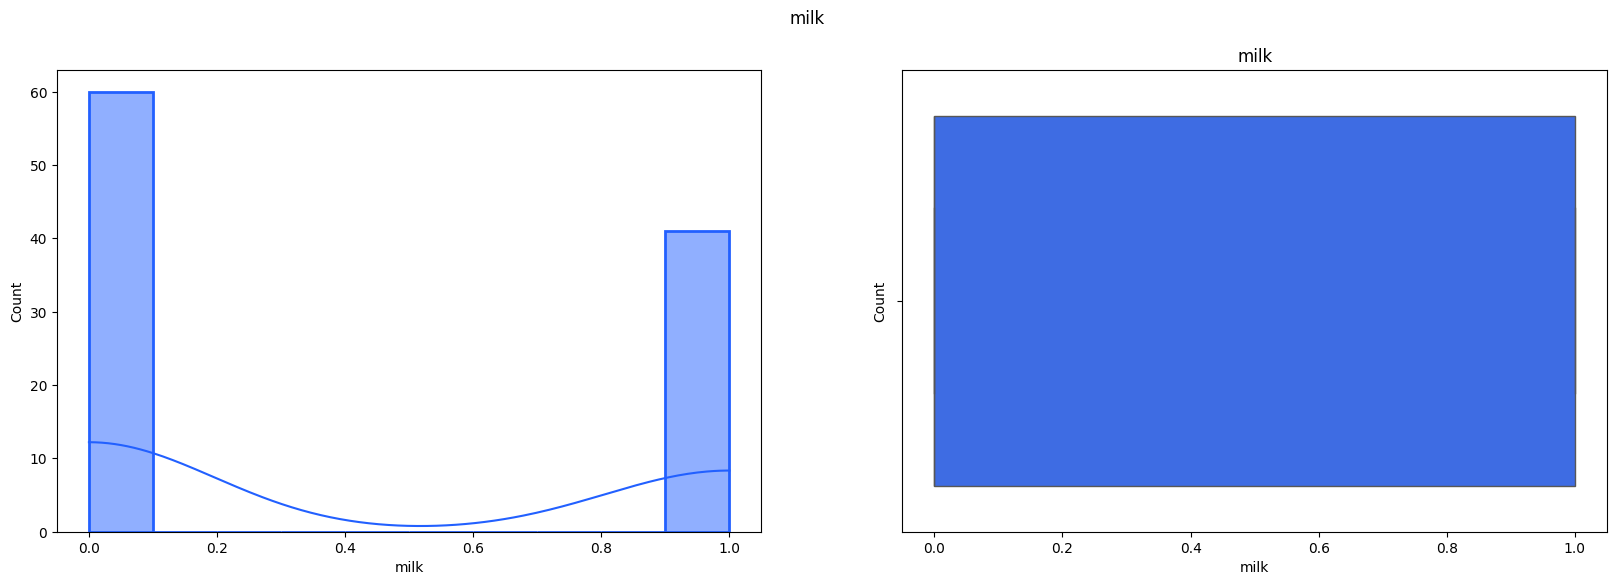

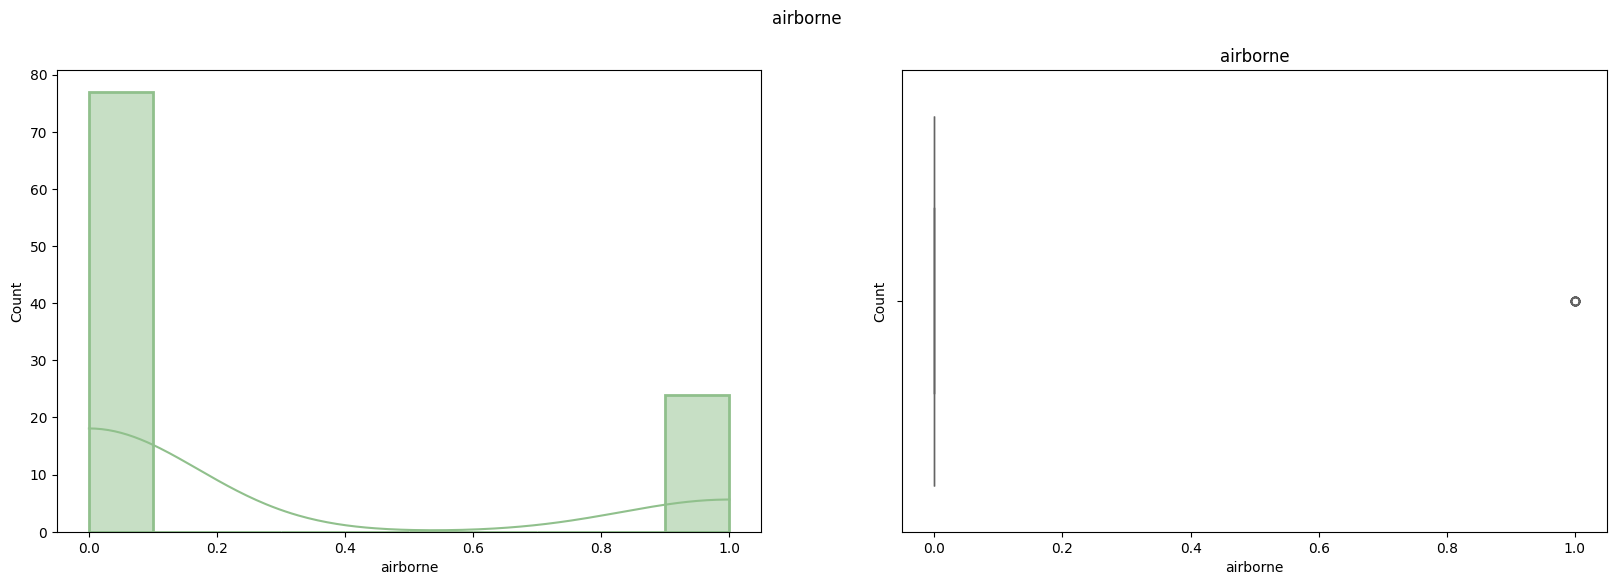

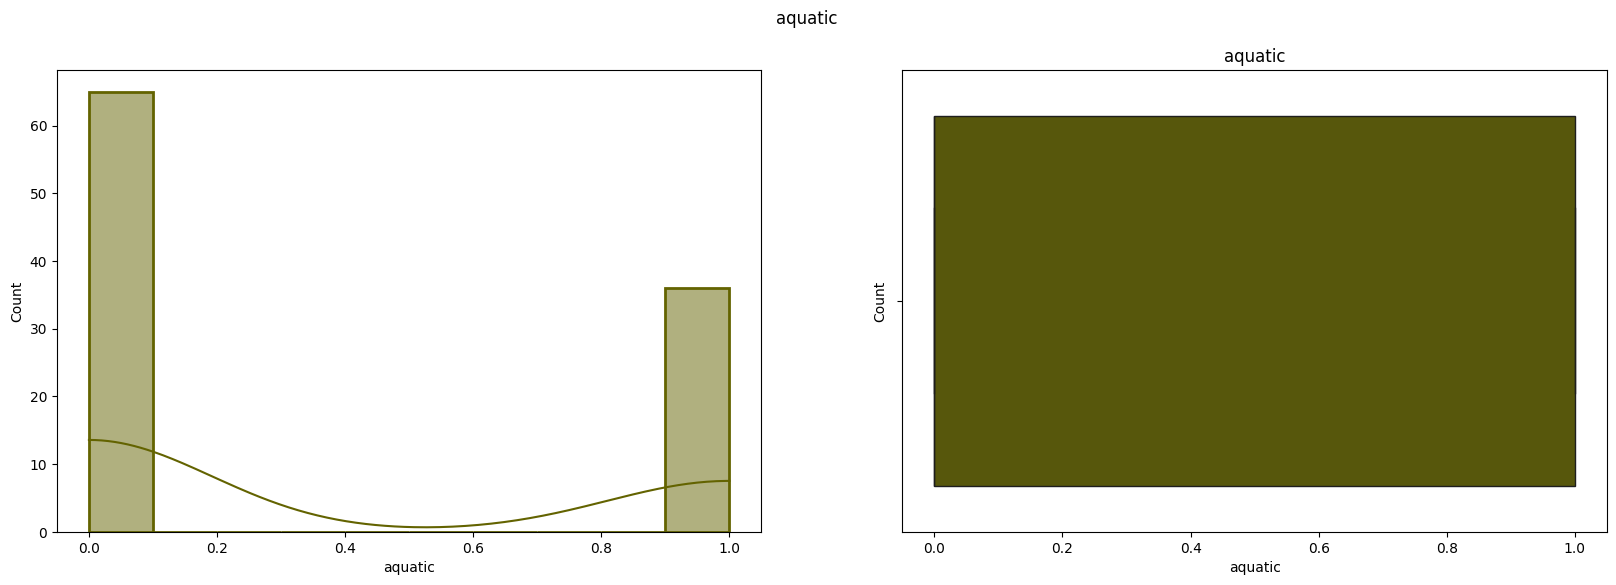

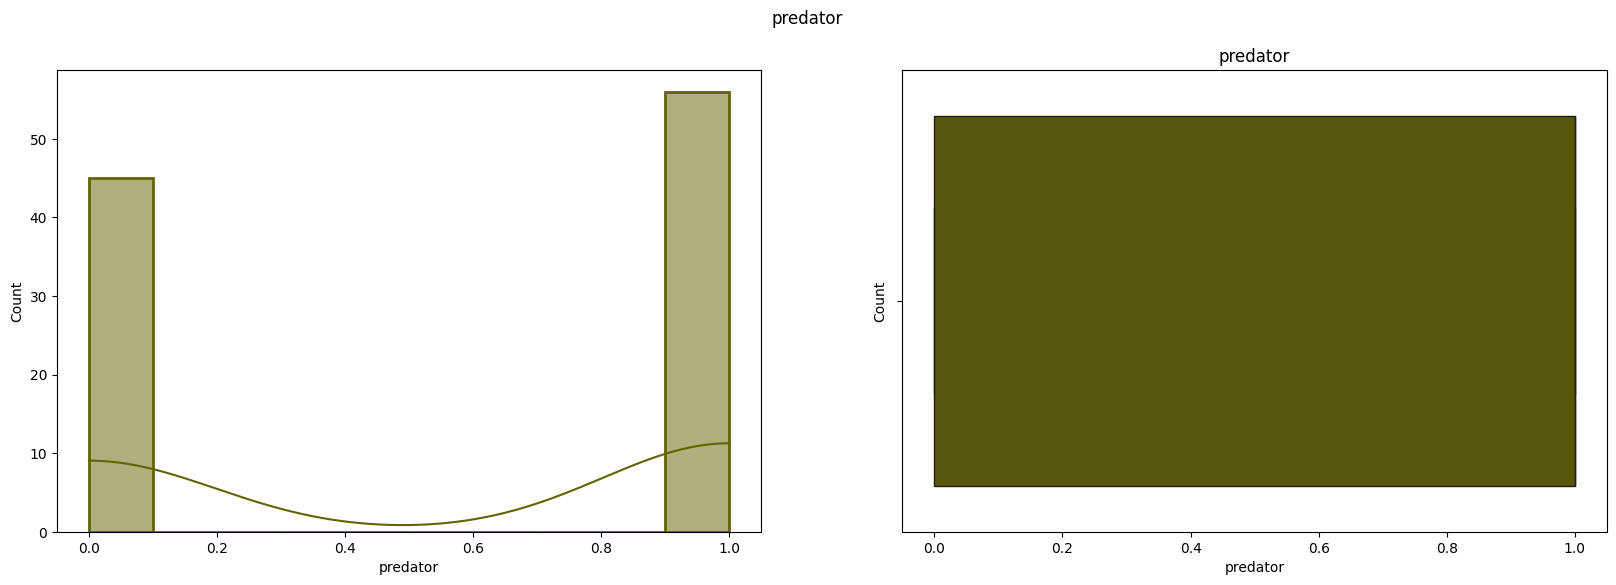

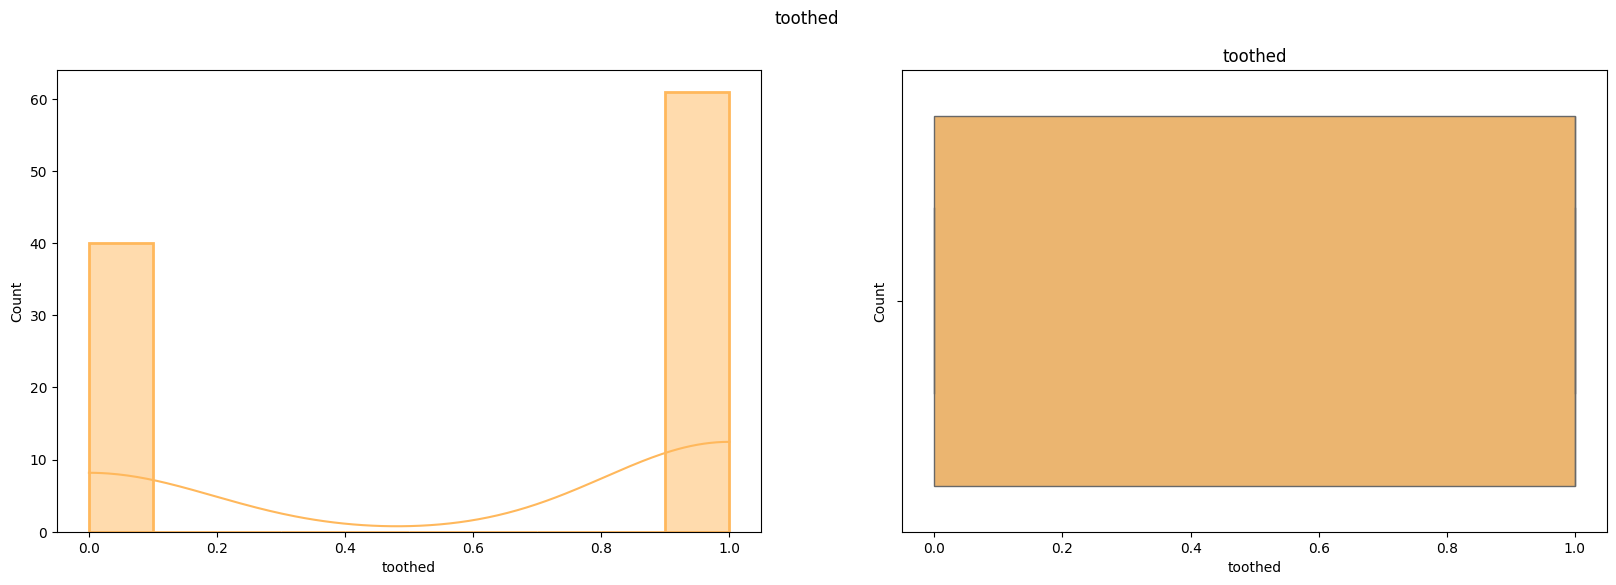

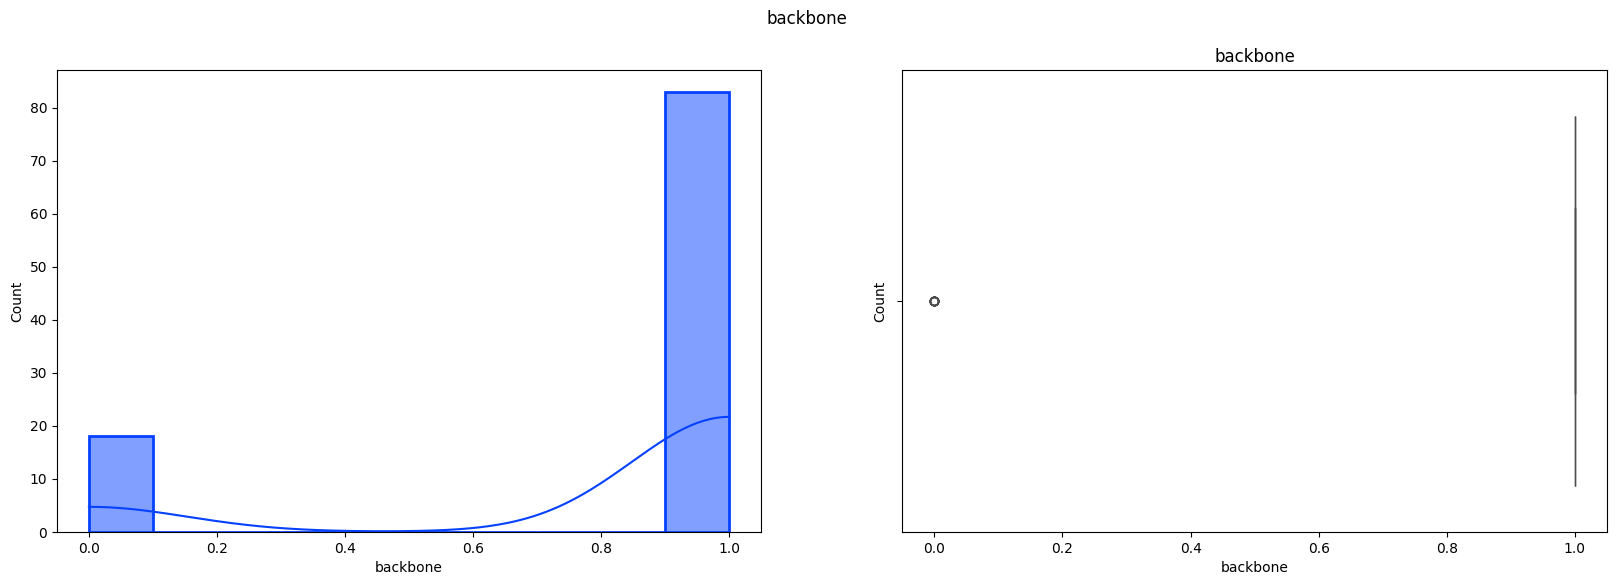

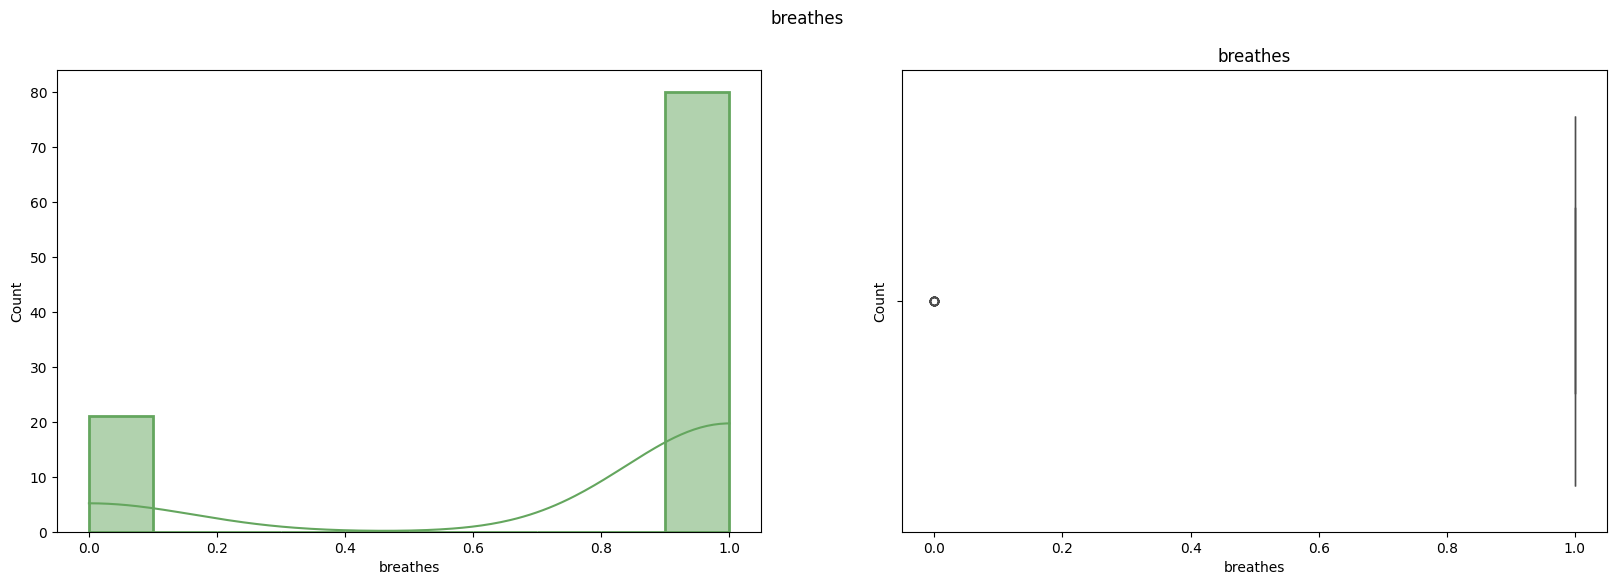

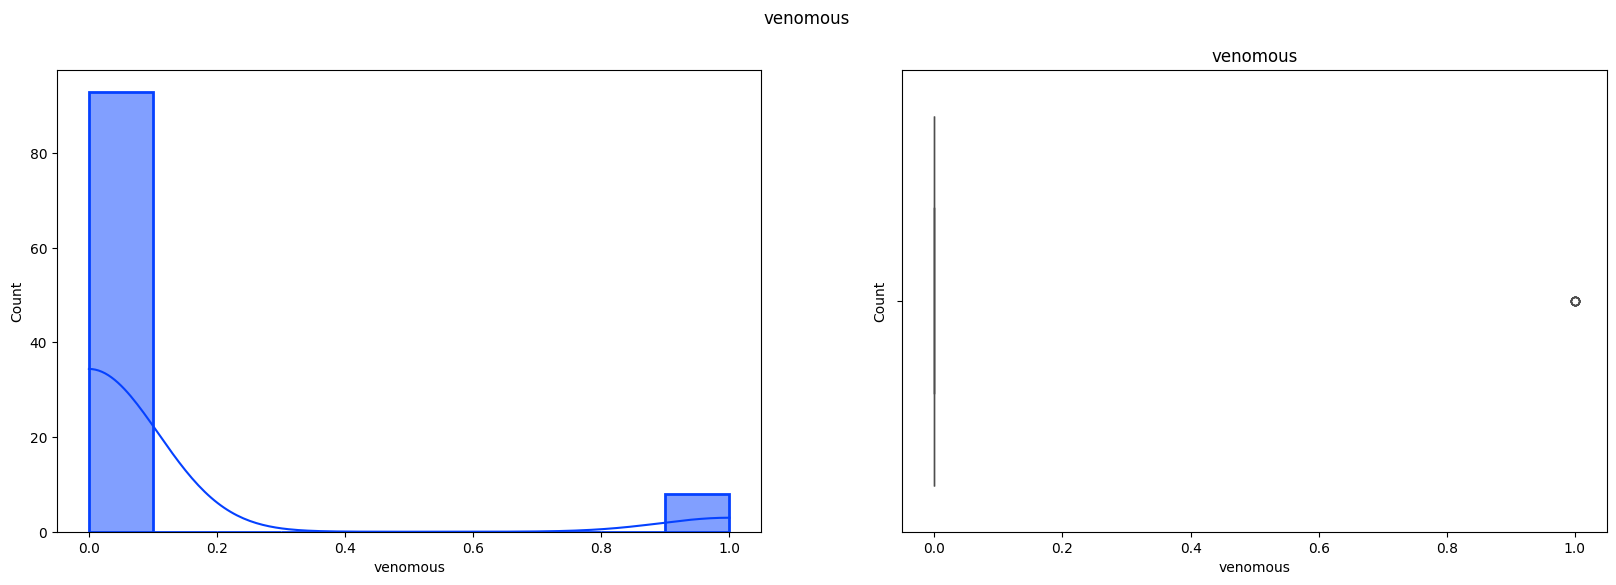

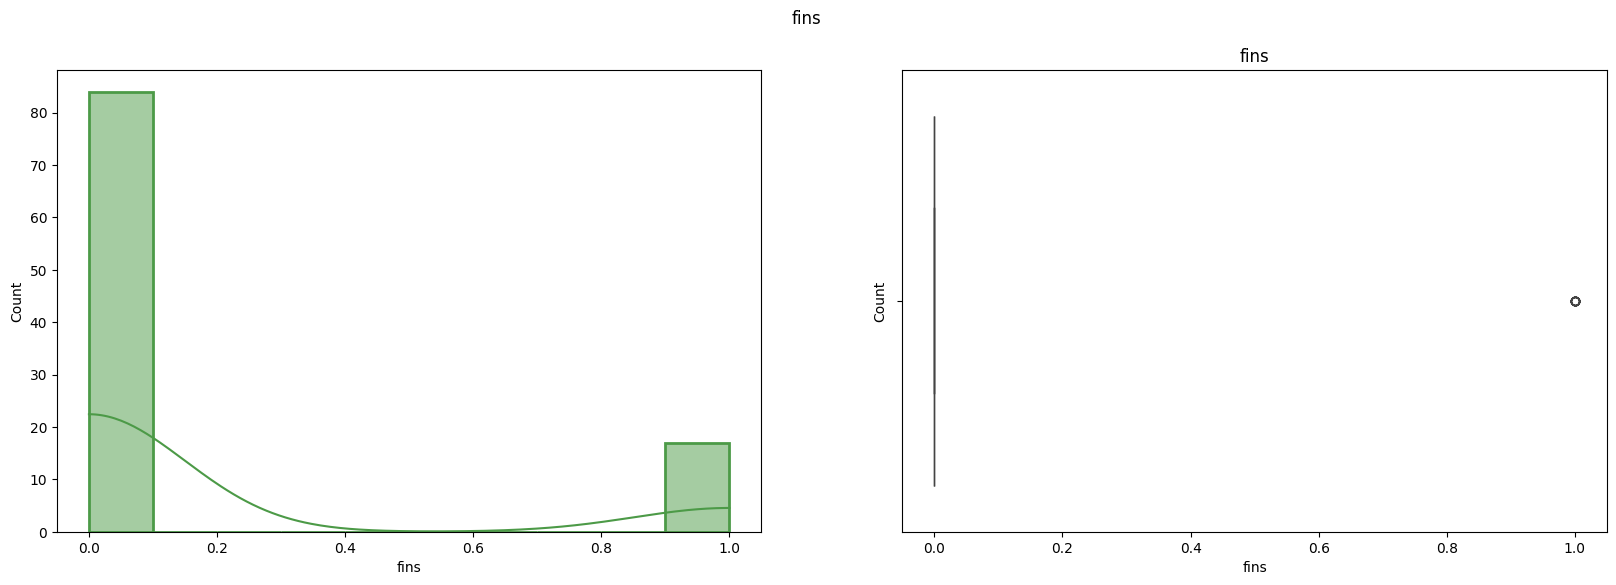

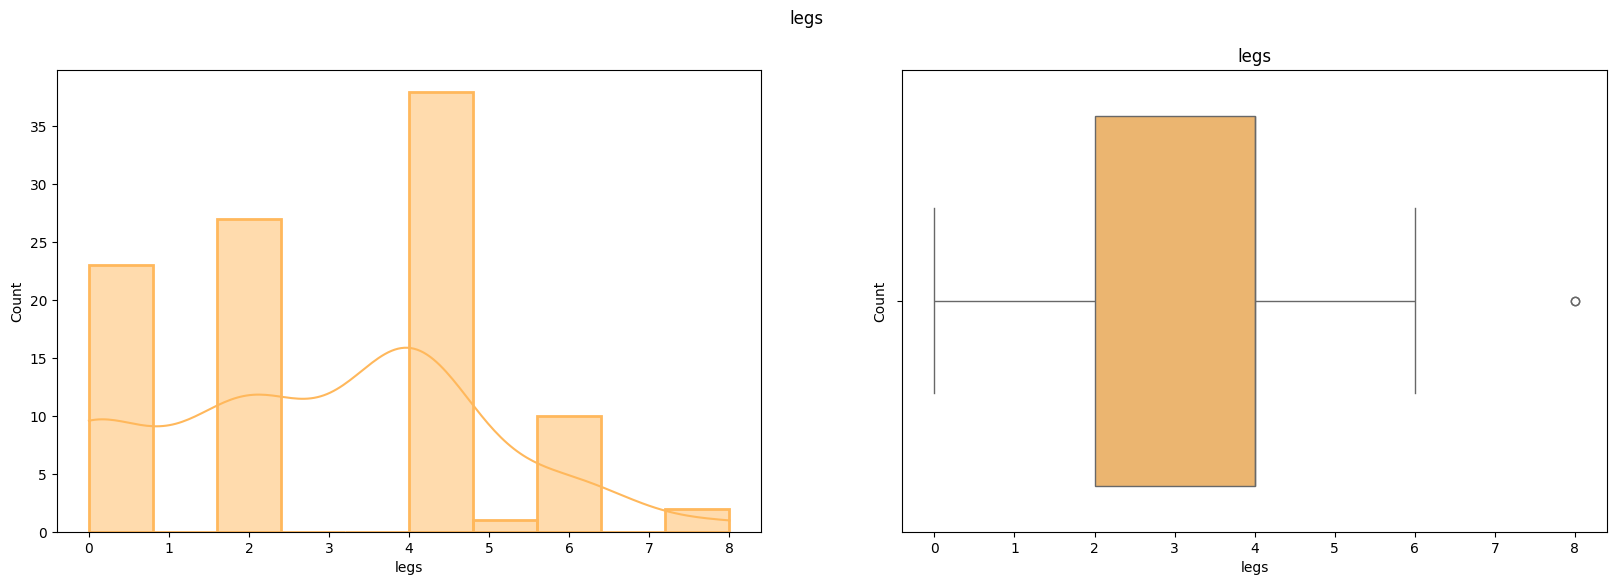

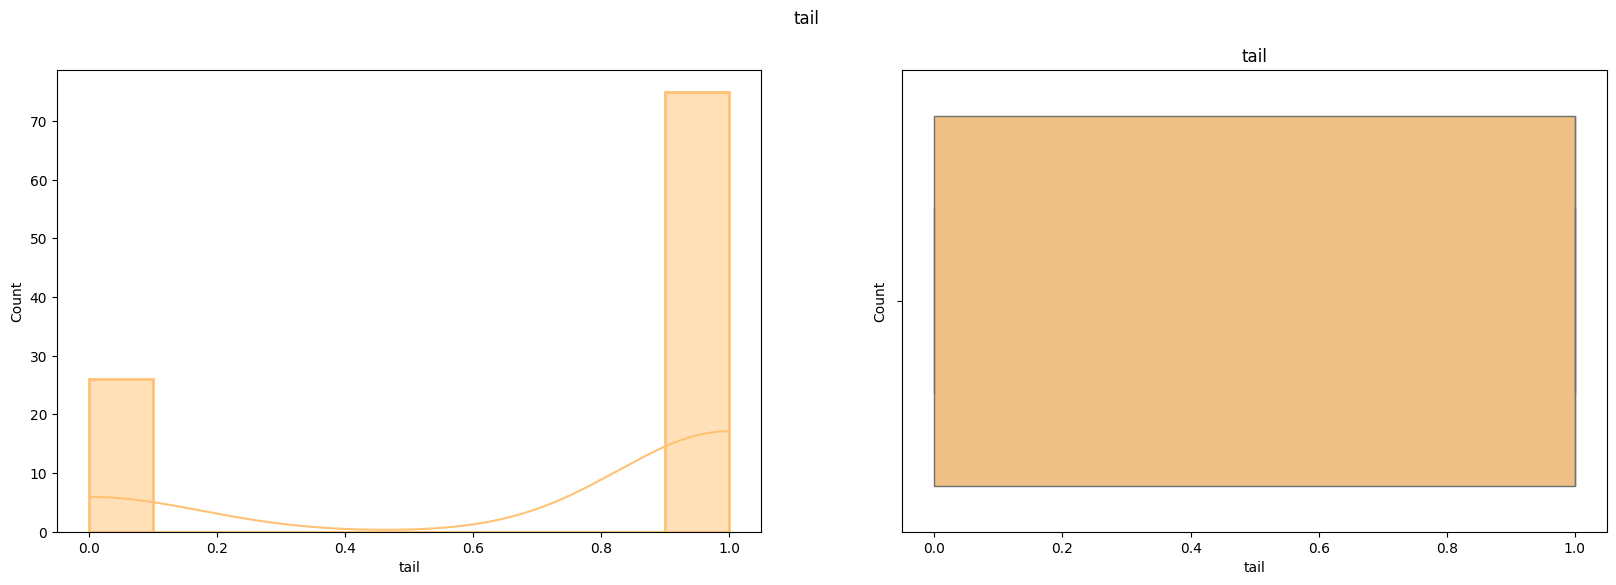

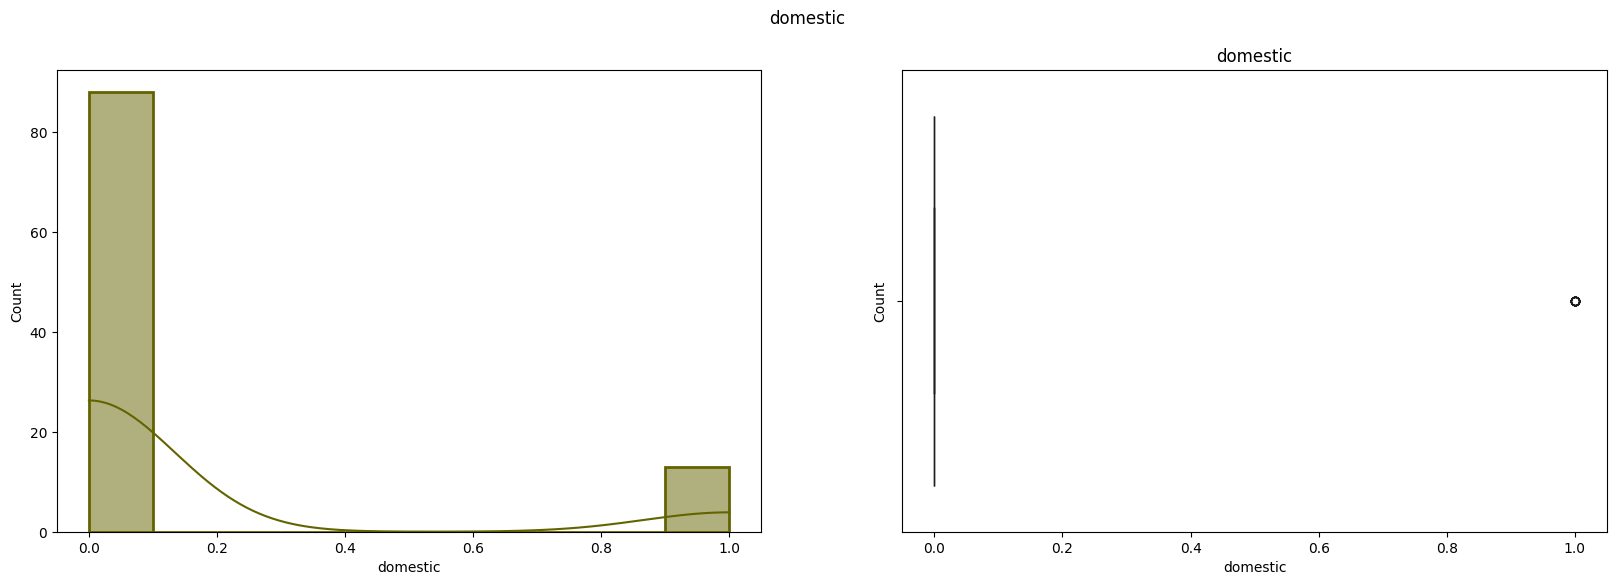

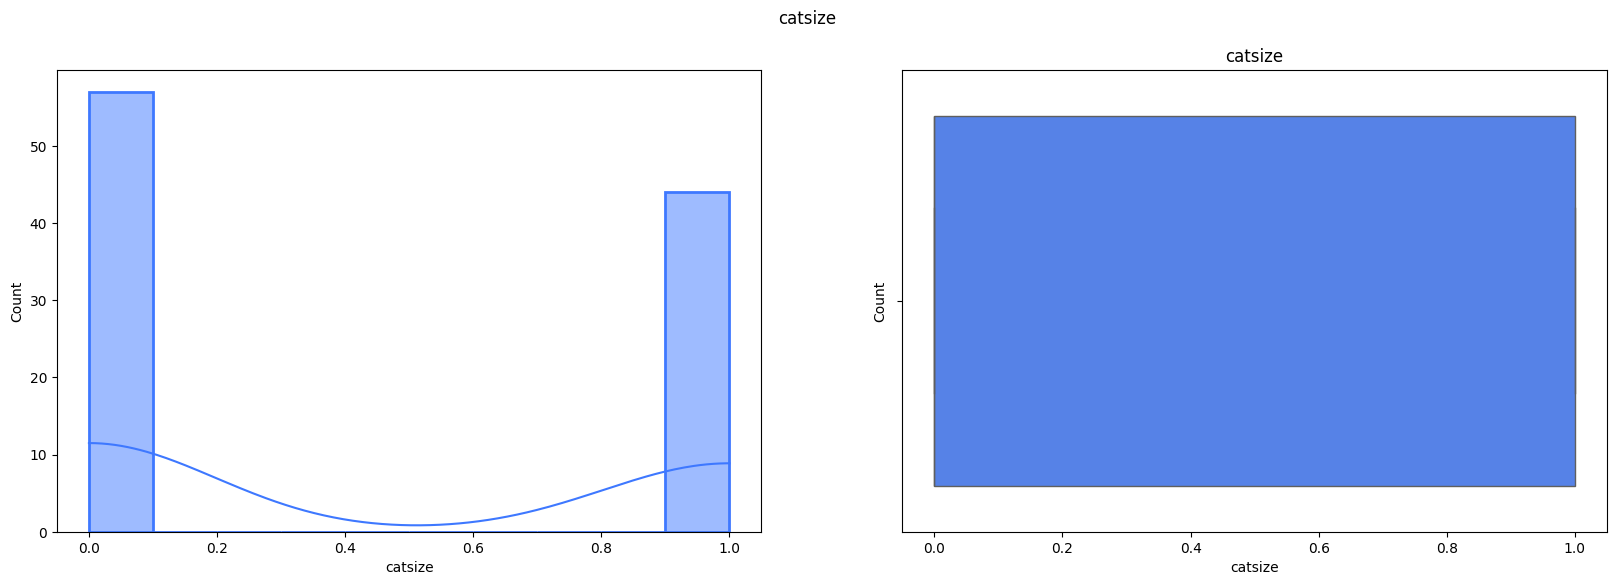

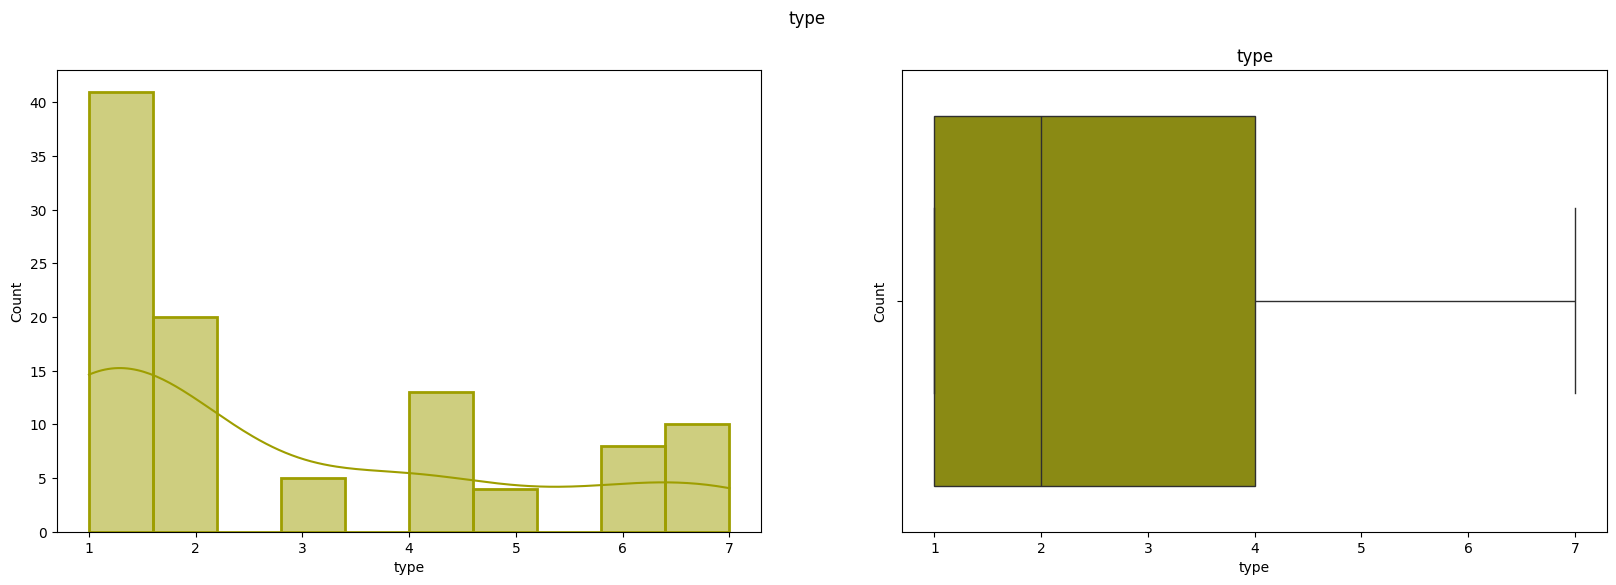

In [408]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

def plot_data(data,feature):

    # Using Seaborn
    if (feature=='animal name'):
        plt.figure(figsize=(20,6))
        plt.subplot(1,1,1)
        sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)
        plt.xticks(rotation = 90,fontsize = 8)
    
    else:
        plt.figure(figsize=(20,6))
        plt.subplot(1,2,1)
        sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)

        plt.subplot(1,2,2)
        sns.boxplot(data=data, x=feature, color=color)
        plt.ylabel('Count')
        plt.suptitle(feature)

for cols in zoo_data.columns:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(zoo_data,cols)
    plt.title(cols)

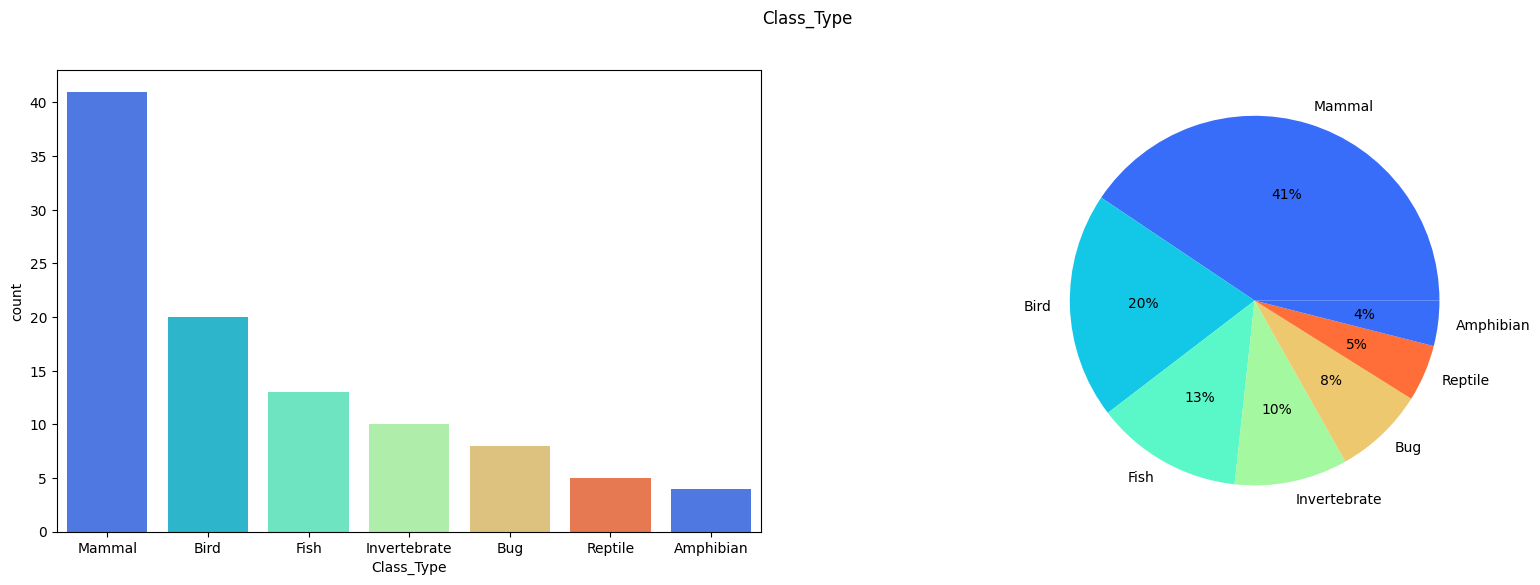

In [409]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
palette_color = sns.color_palette('rainbow')
sns.countplot(x='Class_Type', data=zoo_data_compre, palette = palette_color, order=zoo_data_compre['Class_Type'].value_counts().index )

# Display state data in a form of Pie Graph
plt.subplot(1,2,2)
values = zoo_data_compre['Class_Type'].value_counts().keys().tolist()
counts = zoo_data_compre['Class_Type'].value_counts().tolist()
plt.pie(zoo_data_compre['Class_Type'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('Class_Type')

plt.show()

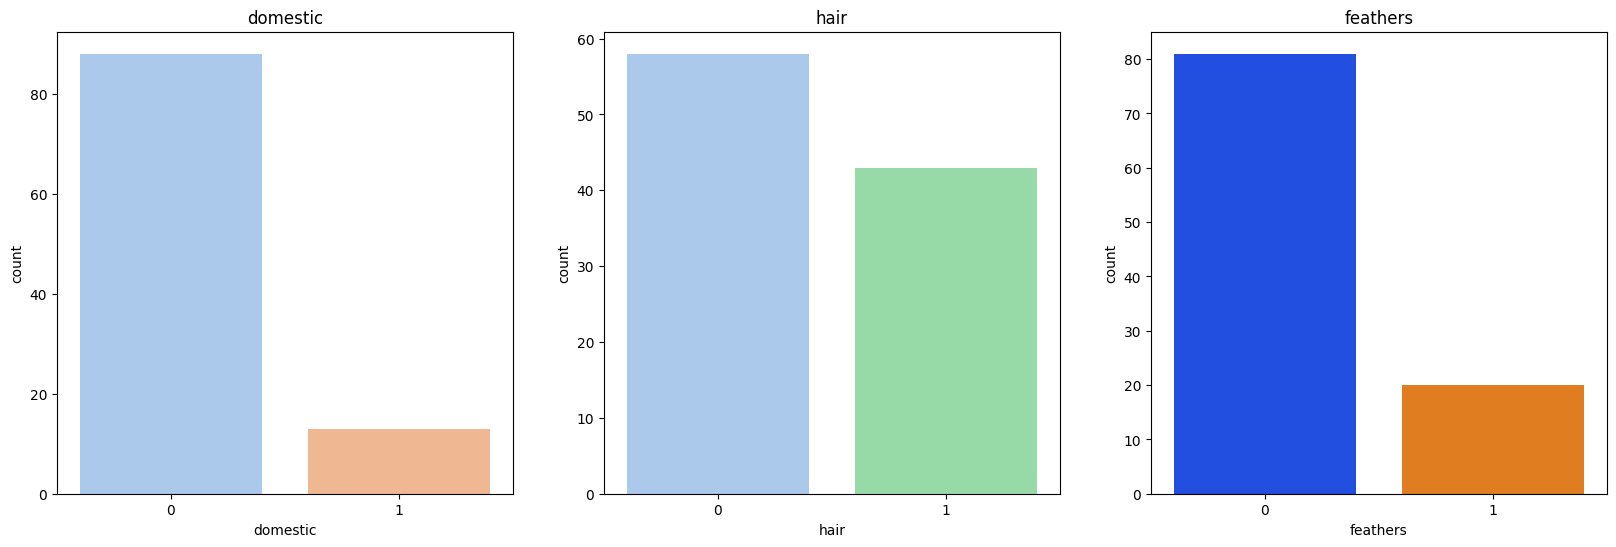

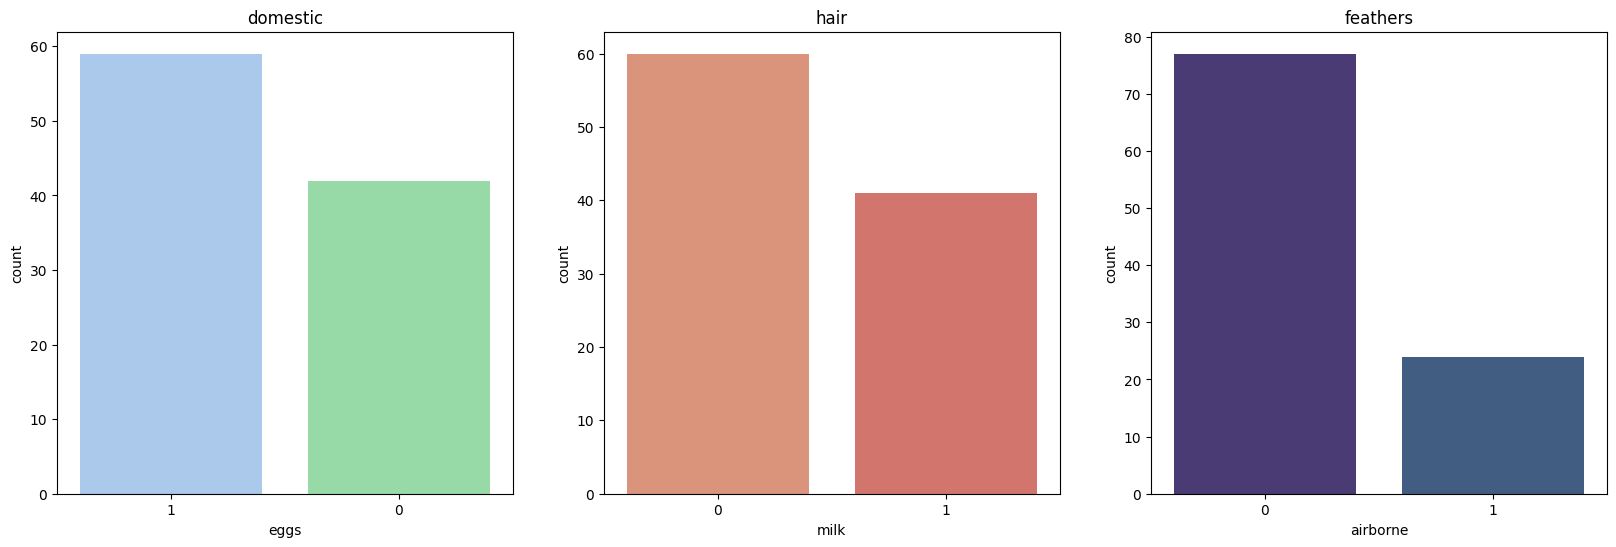

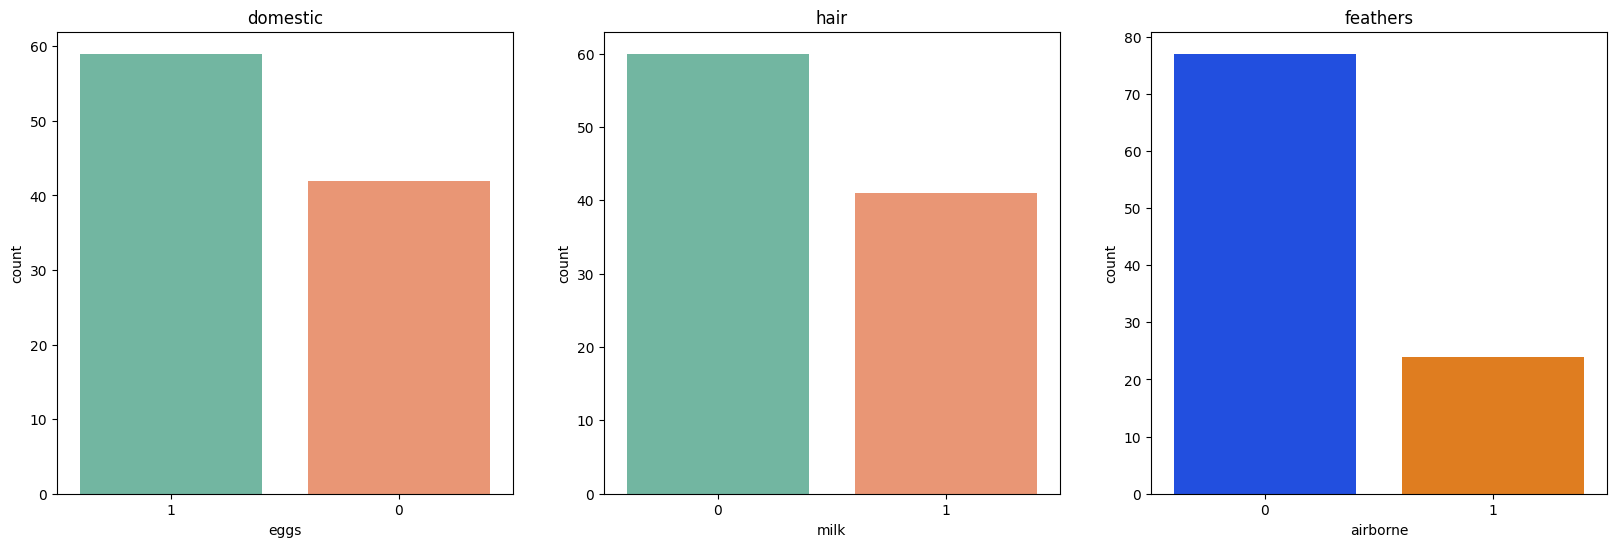

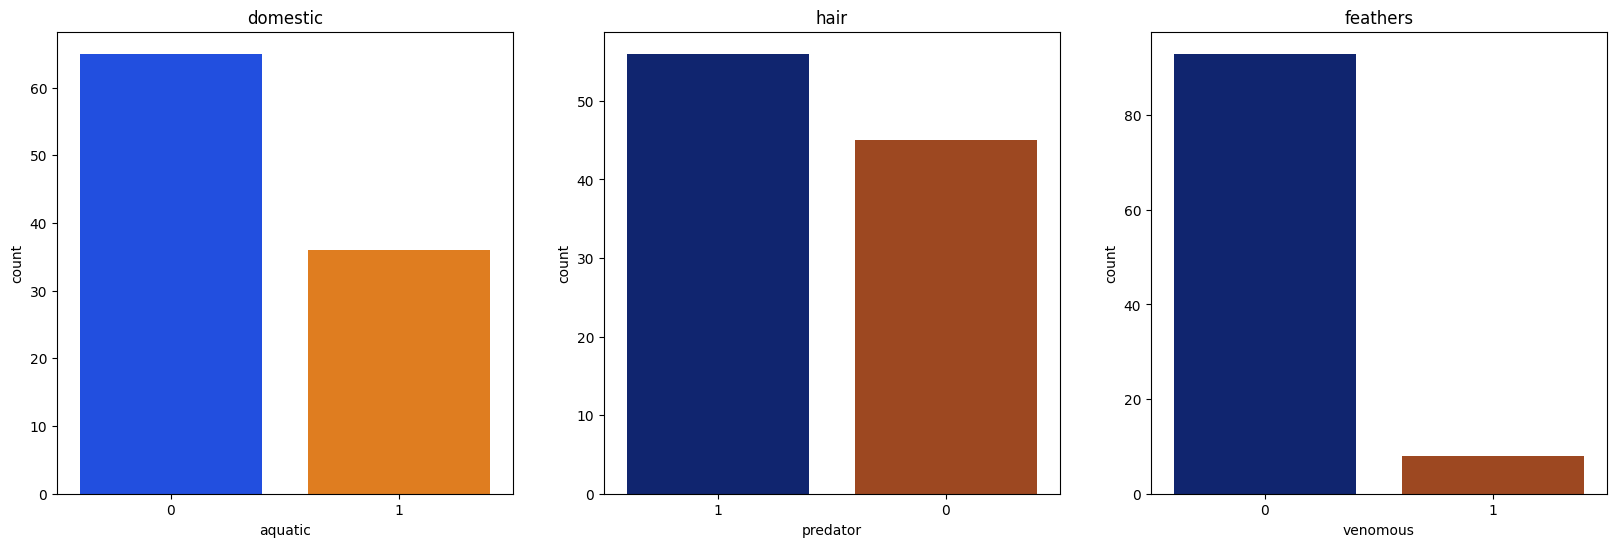

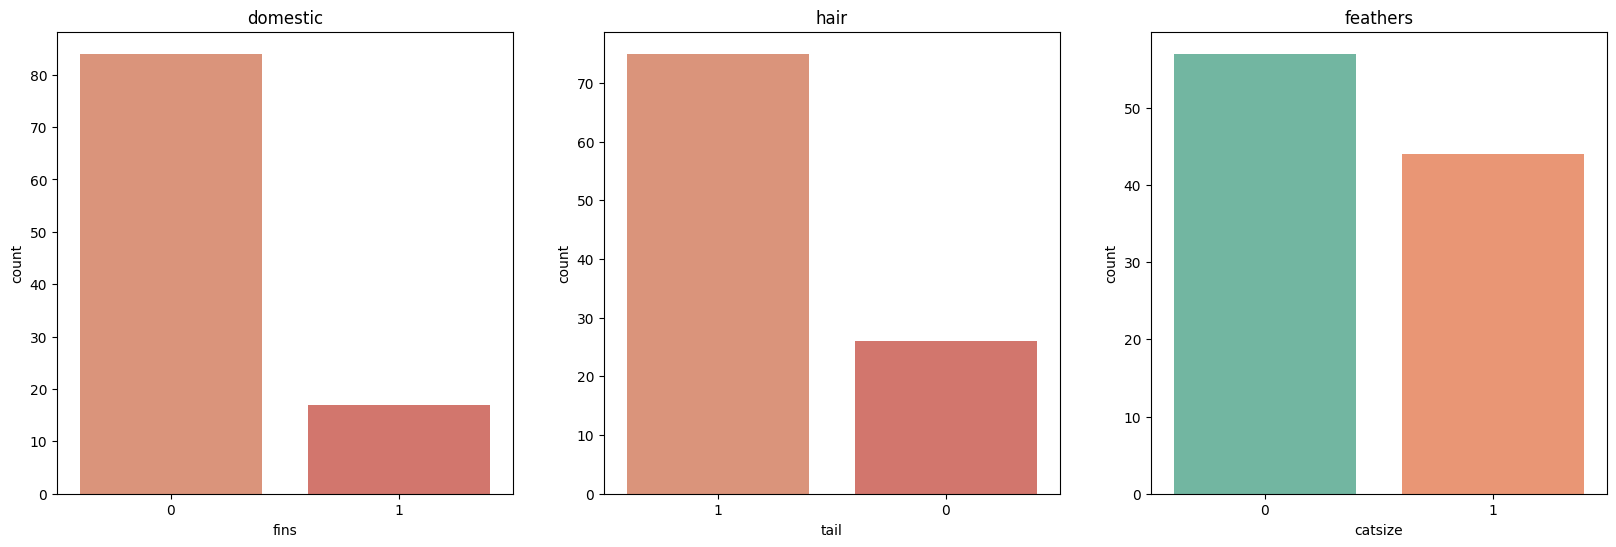

In [410]:
plt.figure(figsize=(20,6))
palette_color = sns.color_palette('rainbow')

colors = ['rainbow','dark','bright','viridis','pastel','Set2','flare','pastel6']

plt.subplot(1,3,1)
palette_color = sns.color_palette(random.choice(colors))
sns.countplot(x='domestic',data=zoo_data_compre, palette = palette_color, order=zoo_data_compre['domestic'].value_counts().index )
plt.title('domestic')

plt.subplot(1,3,2)
palette_color = sns.color_palette(random.choice(colors))
sns.countplot(x='hair',data=zoo_data_compre, palette = palette_color, order=zoo_data_compre['hair'].value_counts().index )
plt.title('hair')

plt.subplot(1,3,3)
palette_color = sns.color_palette(random.choice(colors))
sns.countplot(x='feathers', data=zoo_data_compre, palette = palette_color, order=zoo_data_compre['feathers'].value_counts().index )
plt.title('feathers')

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
palette_color = sns.color_palette(random.choice(colors))
sns.countplot(x='eggs',data=zoo_data_compre, palette = palette_color, order=zoo_data_compre['eggs'].value_counts().index )
plt.title('domestic')

plt.subplot(1,3,2)
palette_color = sns.color_palette(random.choice(colors))
sns.countplot(x='milk',data=zoo_data_compre, palette = palette_color, order=zoo_data_compre['milk'].value_counts().index )
plt.title('hair')

plt.subplot(1,3,3)
palette_color = sns.color_palette(random.choice(colors))
sns.countplot(x='airborne', data=zoo_data_compre, palette = palette_color, order=zoo_data_compre['airborne'].value_counts().index )
plt.title('feathers')

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
palette_color = sns.color_palette(random.choice(colors))
sns.countplot(x='eggs',data=zoo_data_compre, palette = palette_color, order=zoo_data_compre['eggs'].value_counts().index )
plt.title('domestic')

plt.subplot(1,3,2)
palette_color = sns.color_palette(random.choice(colors))
sns.countplot(x='milk',data=zoo_data_compre, palette = palette_color, order=zoo_data_compre['milk'].value_counts().index )
plt.title('hair')

plt.subplot(1,3,3)
palette_color = sns.color_palette(random.choice(colors))
sns.countplot(x='airborne', data=zoo_data_compre, palette = palette_color, order=zoo_data_compre['airborne'].value_counts().index )
plt.title('feathers')

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
palette_color = sns.color_palette(random.choice(colors))
sns.countplot(x='aquatic',data=zoo_data_compre, palette = palette_color, order=zoo_data_compre['aquatic'].value_counts().index )
plt.title('domestic')

plt.subplot(1,3,2)
palette_color = sns.color_palette(random.choice(colors))
sns.countplot(x='predator',data=zoo_data_compre, palette = palette_color, order=zoo_data_compre['predator'].value_counts().index )
plt.title('hair')

plt.subplot(1,3,3)
palette_color = sns.color_palette(random.choice(colors))
sns.countplot(x='venomous', data=zoo_data_compre, palette = palette_color, order=zoo_data_compre['venomous'].value_counts().index )
plt.title('feathers')

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
palette_color = sns.color_palette(random.choice(colors))
sns.countplot(x='fins',data=zoo_data_compre, palette = palette_color, order=zoo_data_compre['fins'].value_counts().index )
plt.title('domestic')

plt.subplot(1,3,2)
palette_color = sns.color_palette(random.choice(colors))
sns.countplot(x='tail',data=zoo_data_compre, palette = palette_color, order=zoo_data_compre['tail'].value_counts().index )
plt.title('hair')

plt.subplot(1,3,3)
palette_color = sns.color_palette(random.choice(colors))
sns.countplot(x='catsize', data=zoo_data_compre, palette = palette_color, order=zoo_data_compre['catsize'].value_counts().index )
plt.title('feathers')

plt.show()

### **Correlation Matrix**
Check for Assumption: Independent variables are independent of each other

In [411]:
zoo_data.head()  # The non-numeric column is the 'animal name' column

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [412]:
# Decide which categorical variables you want to use in model
for columns in zoo_data.columns:
    if zoo_data[columns].dtypes == 'object':
        unique_count = len(zoo_data[columns].unique())
        print("\n------------------------------------------\n")
        print(f"There are {unique_count} unique '{columns}'")
        print("\n", zoo_data[columns].value_counts(),"\n")
        print(f"The {len(zoo_data['animal name'].unique())} unique animals are -\n{zoo_data['animal name'].unique()}\n")


------------------------------------------

There are 100 unique 'animal name'

 animal name
frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: count, Length: 100, dtype: int64 

The 100 unique animals are -
['aardvark' 'antelope' 'bass' 'bear' 'boar' 'buffalo' 'calf' 'carp'
 'catfish' 'cavy' 'cheetah' 'chicken' 'chub' 'clam' 'crab' 'crayfish'
 'crow' 'deer' 'dogfish' 'dolphin' 'dove' 'duck' 'elephant' 'flamingo'
 'flea' 'frog' 'fruitbat' 'giraffe' 'girl' 'gnat' 'goat' 'gorilla' 'gull'
 'haddock' 'hamster' 'hare' 'hawk' 'herring' 'honeybee' 'housefly' 'kiwi'
 'ladybird' 'lark' 'leopard' 'lion' 'lobster' 'lynx' 'mink' 'mole'
 'mongoose' 'moth' 'newt' 'octopus' 'opossum' 'oryx' 'ostrich' 'parakeet'
 'penguin' 'pheasant' 'pike' 'piranha' 'pitviper' 'platypus' 'polecat'
 'pony' 'porpoise' 'puma' 'pussycat' 'raccoon' 'reindeer' 'rhea'
 'scorpion' 'seahorse' 'seal' 'sealion' 'seasnak

In [413]:
zoo_data.iloc[:,1:].corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


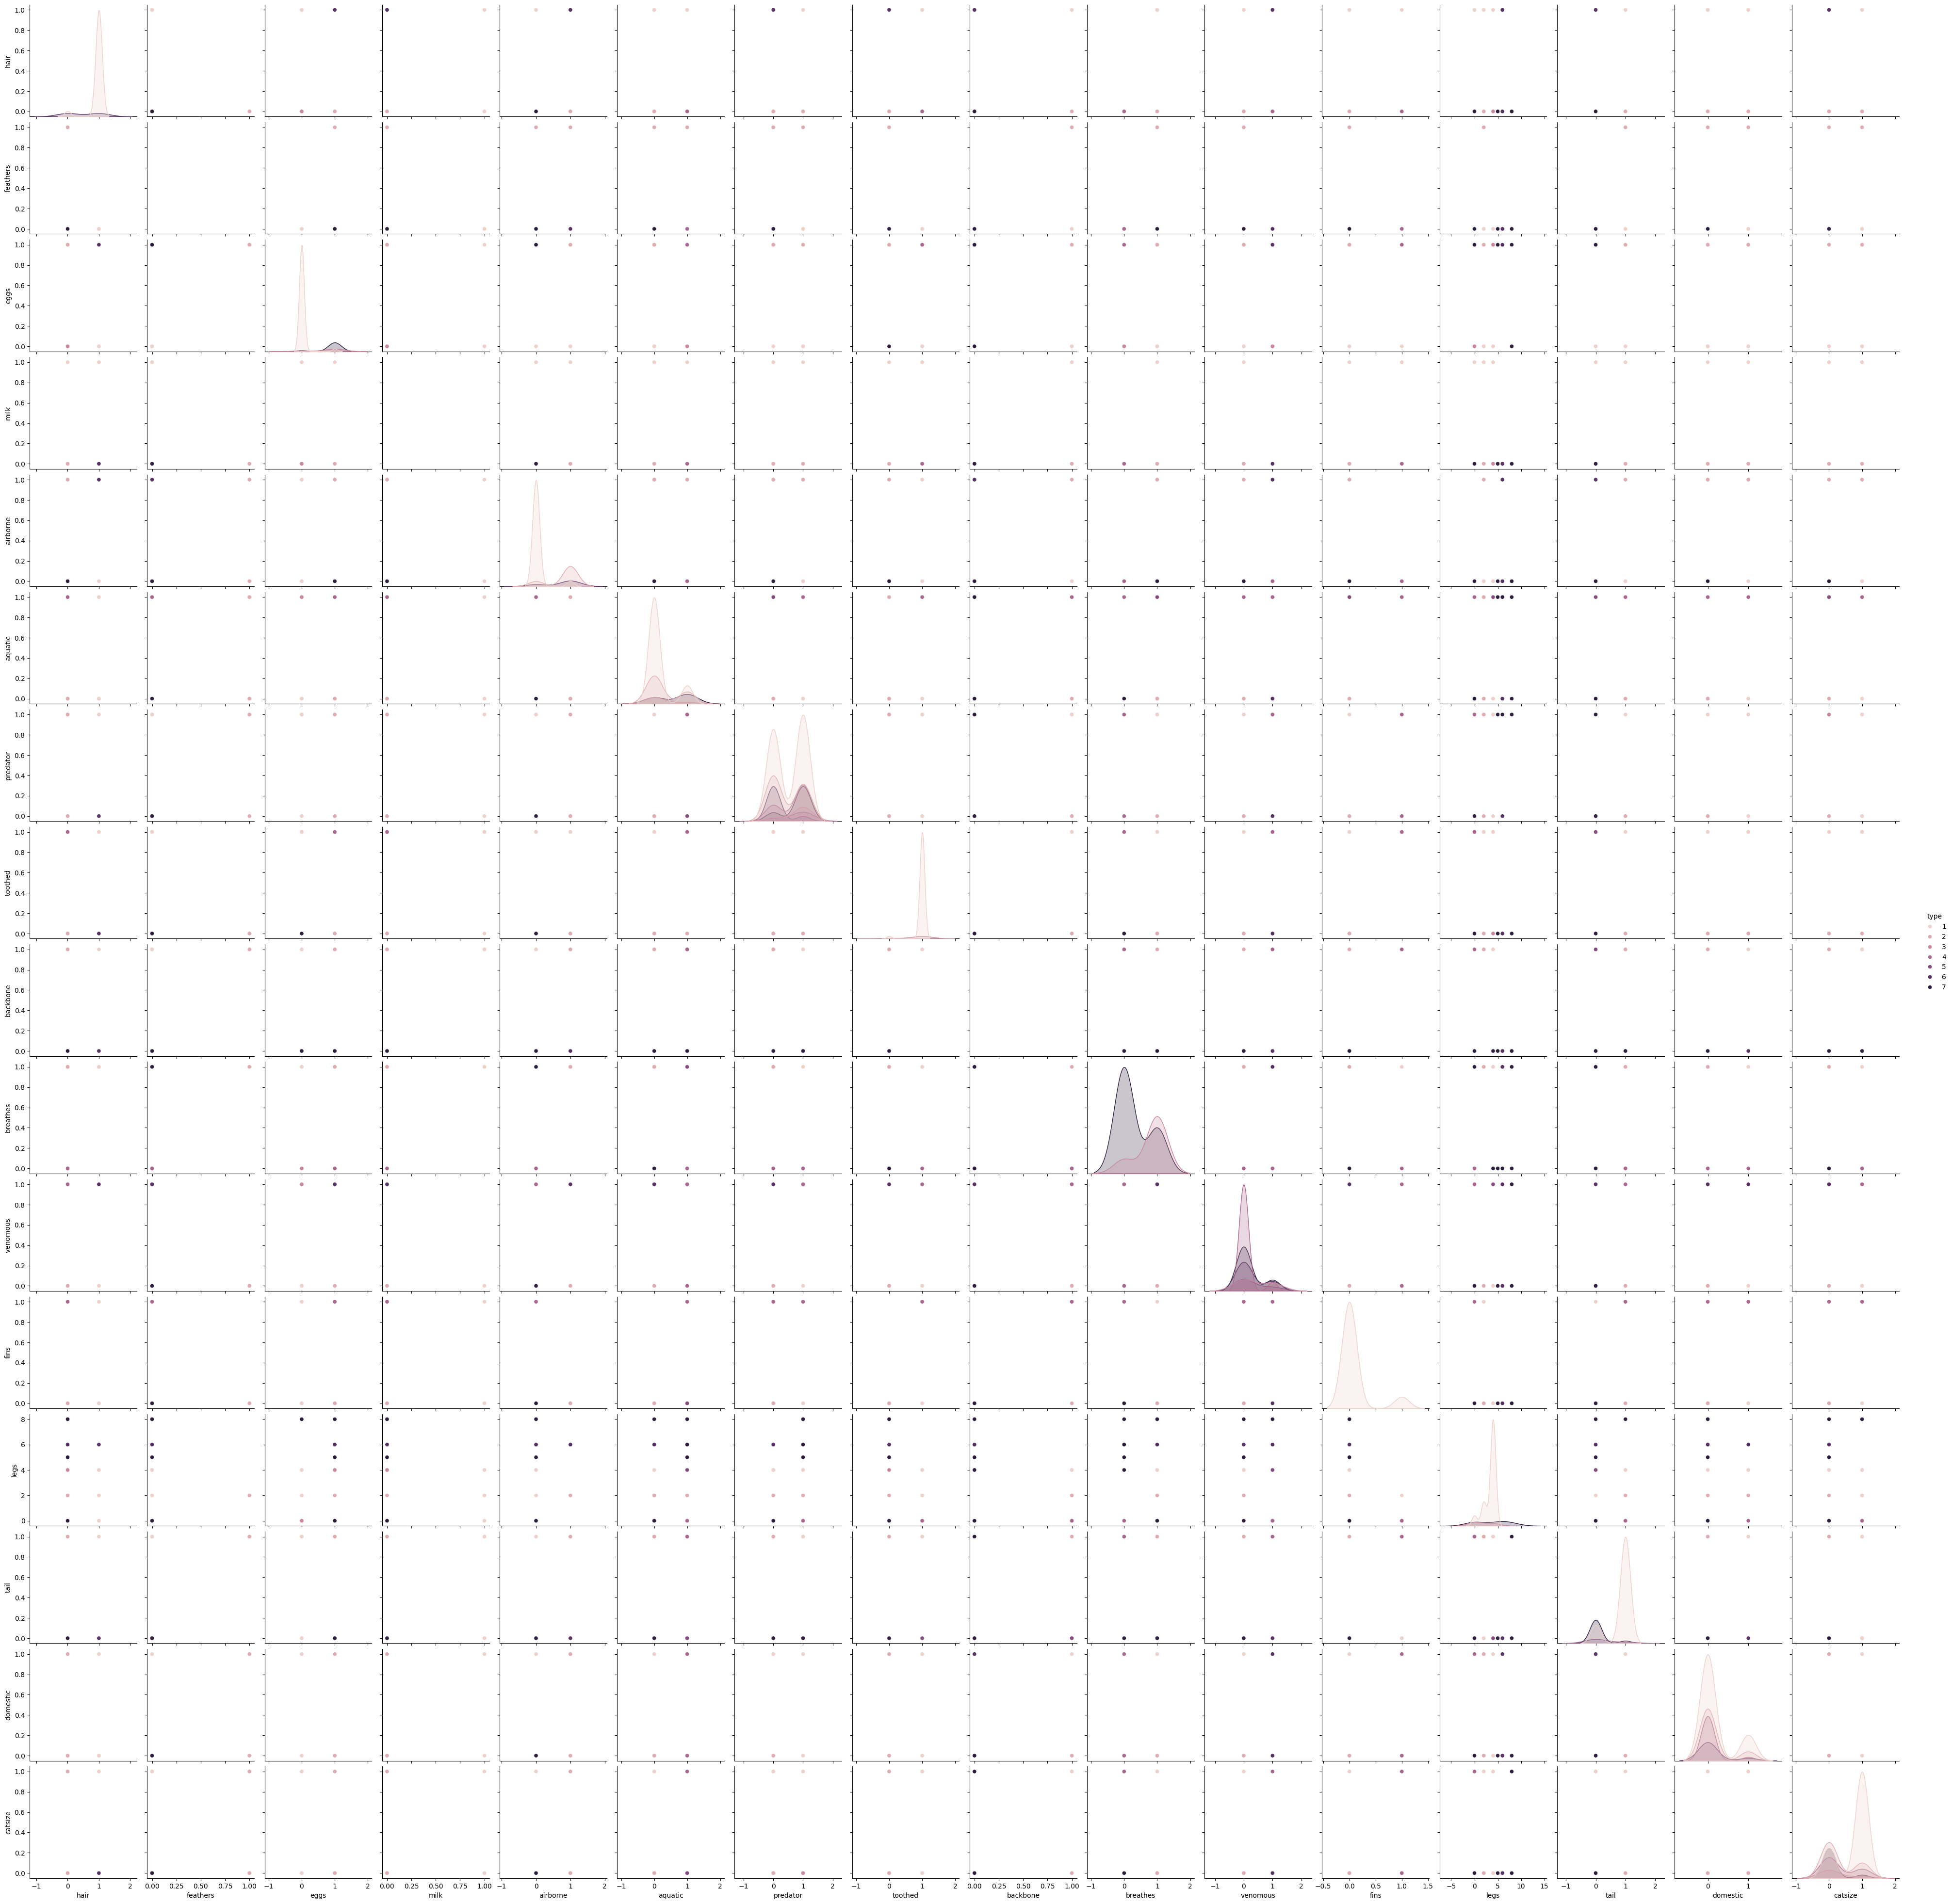

In [414]:
sns.pairplot(zoo_data, hue='type')

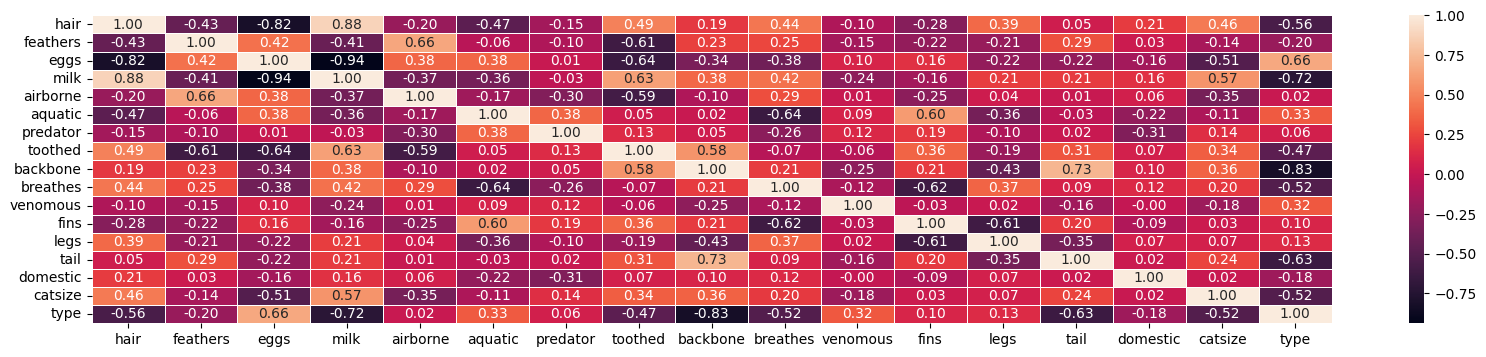

In [415]:
# Correlation Heatmap
f,ax = plt.subplots(figsize=(20,4))
sns.heatmap(zoo_data.iloc[:,1:].corr(), annot=True, linewidths =.5, fmt ='.2f',ax=ax)
plt.show()

### **KNN Model Building** ###

In [416]:
x_zoo = zoo_data.iloc[:, 1:17]
y_zoo = zoo_data.iloc[:, 16]
x_zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [417]:
y_zoo

0      1
1      1
2      0
3      1
4      1
      ..
96     1
97     0
98     1
99     0
100    0
Name: catsize, Length: 101, dtype: int64

### **Splitting the data into train and test** ###

In [418]:
from sklearn.model_selection import train_test_split
x_train_zoo, x_test_zoo, y_train_zoo, y_test_zoo = train_test_split(x_zoo,y_zoo,test_size=0.2,random_state=0)

*Using the Default Option - n_neighbors = 5; metric = 'minkowski'*

In [419]:
# Creating model with default option i.e., n_neighbors = 5; metric = 'minkowski'
from sklearn.neighbors import KNeighborsClassifier
knn_zoo_model_d = KNeighborsClassifier()
knn_zoo_model_d.fit(x_train_zoo,y_train_zoo)

KNeighborsClassifier()

In [420]:
accuracy_zoo_d = knn_zoo_model_d.score(x_test_zoo,y_test_zoo)
accuracy_zoo_d

0.9047619047619048

#### *Calculating the ideal k value* ####

In [421]:
# Generally, k value should be the square root of the number of test records and it should be an odd number

# Calculating the square root of the number of test records
k_zoo = np.sqrt(len(y_test_zoo))

# See if k value is even then convert it to odd
k_zoo = int(k_zoo)
if k_zoo % 2 == 0:
    k_zoo += 1
k_zoo = int(k_zoo)
print(f"The calculated k value is {k_zoo}")

# Here the calculated k value happens to be the same as the default value taken by the KNeighborsClassifier function

The calculated k value is 5


*Creation of a model using the calculated k value for n_neighbors i.e. n_neighbors = 5 and metric = 'euclidean'*

In [422]:
# Creating model with default option i.e., n_neighbors = 5 with a change that the metric = 'euclidean'
from sklearn.neighbors import KNeighborsClassifier
knn_zoo_model_1 = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn_zoo_model_1.fit(x_train_zoo,y_train_zoo)

KNeighborsClassifier(metric='euclidean')

In [423]:
accuracy_zoo_1 = knn_zoo_model_1.score(x_test_zoo,y_test_zoo)
accuracy_zoo_1

# This is giving the same result as the default option

0.9047619047619048

In [424]:
# Using the default metric for calculation of distance i.e., metric = 'minkowski'
k_zoo_range_f = range(1,35)
k_zoo_scores_f = []

for kz in k_zoo_range_f:
    knn_zoo_model_f = KNeighborsClassifier(n_neighbors = kz)
    knn_zoo_model_f.fit(x_train_zoo,y_train_zoo)
    accuracy_zoo_f = knn_zoo_model_f.score(x_test_zoo,y_test_zoo)
    k_zoo_scores_f.append(accuracy_zoo_f)
    print(f'k = {kz} ; Accuracy = {accuracy_zoo_f}')

k = 1 ; Accuracy = 0.9523809523809523
k = 2 ; Accuracy = 0.8571428571428571
k = 3 ; Accuracy = 0.8095238095238095
k = 4 ; Accuracy = 0.8571428571428571
k = 5 ; Accuracy = 0.9047619047619048
k = 6 ; Accuracy = 0.8571428571428571
k = 7 ; Accuracy = 0.8095238095238095
k = 8 ; Accuracy = 0.8095238095238095
k = 9 ; Accuracy = 0.8095238095238095
k = 10 ; Accuracy = 0.8095238095238095
k = 11 ; Accuracy = 0.8095238095238095
k = 12 ; Accuracy = 0.8095238095238095
k = 13 ; Accuracy = 0.8095238095238095
k = 14 ; Accuracy = 0.8095238095238095
k = 15 ; Accuracy = 0.8095238095238095
k = 16 ; Accuracy = 0.8095238095238095
k = 17 ; Accuracy = 0.7619047619047619
k = 18 ; Accuracy = 0.7619047619047619
k = 19 ; Accuracy = 0.7619047619047619
k = 20 ; Accuracy = 0.7619047619047619
k = 21 ; Accuracy = 0.7619047619047619
k = 22 ; Accuracy = 0.7619047619047619
k = 23 ; Accuracy = 0.7619047619047619
k = 24 ; Accuracy = 0.7619047619047619
k = 25 ; Accuracy = 0.7619047619047619
k = 26 ; Accuracy = 0.761904761904

Text(0, 0.5, 'Accuracy')

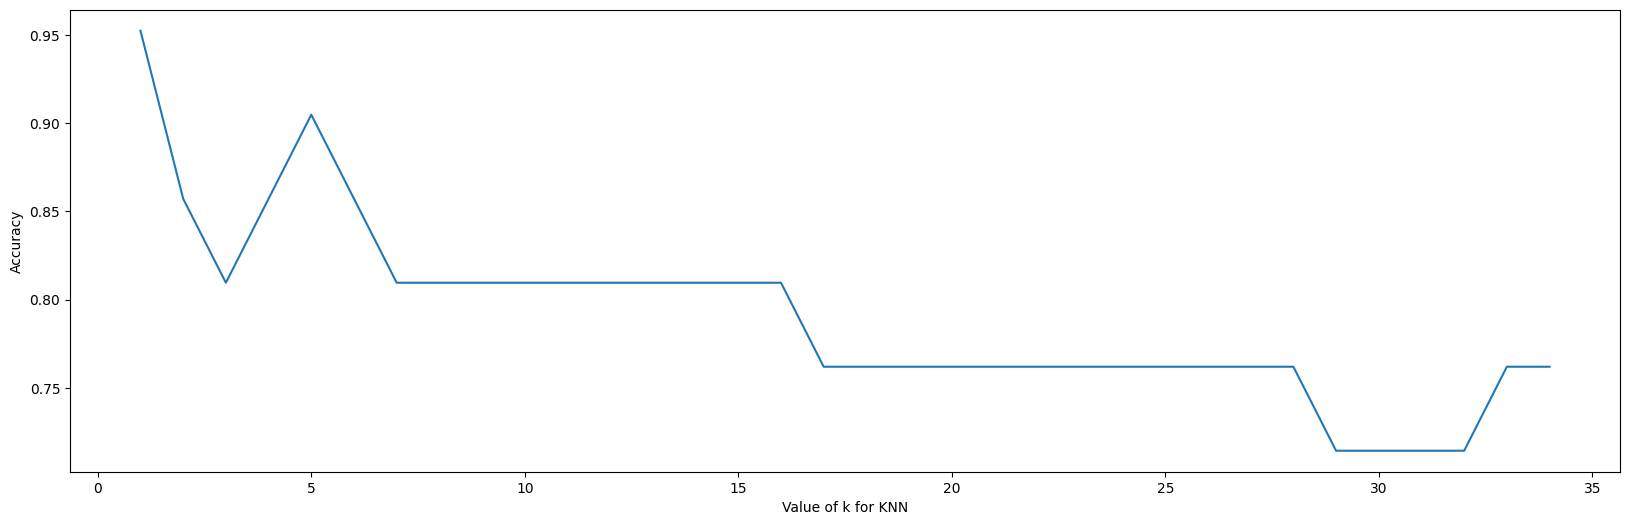

In [425]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(k_zoo_range_f,k_zoo_scores_f)
plt.xlabel("Value of k for KNN")
plt.ylabel("Accuracy")

# The same results are obtained by using the distance metric as 'euclidean' i.e., metric = 'euclidean'

INFERENCE:
- The highest score is received for k = 1 i.e., 0.9523809523809523.
  We cannot take k=1 as it indicates only 1 neighbour to assess the new data point. It may show high or low accuracy but we should ignore it.
- We can start with k values from 2 onwards. Thus k = 5 is the showing the highest accuracy value of 0.9047619047619048.

We can consider k = 5 for n_neighbors as it gives the highest score.

### ***Using Grid Search for choosing the best value for k*** ###

In [426]:
knn_zoo_model = KNeighborsClassifier(n_neighbors = 17)

In [427]:
kfold_zoo = KFold(n_splits=12)
results_zoo = cross_val_score(knn_zoo_model, x_zoo, y_zoo, cv = kfold_zoo)

In [428]:
results_zoo

array([1.        , 0.88888889, 0.55555556, 0.88888889, 0.88888889,
       0.75      , 0.375     , 0.875     , 0.75      , 0.875     ,
       0.5       , 0.75      ])

In [429]:
results_zoo.mean()

0.7581018518518517

#### *Grid Search for Algorithm Tuning* ####

In [430]:
n_neighbors_zoo = list(range(1,40))
zoo_parameters = {'n_neighbors' : n_neighbors_zoo}

In [431]:
knn_zoo_model2 = KNeighborsClassifier()
zoo_grid = GridSearchCV(estimator = knn_zoo_model2, param_grid = zoo_parameters)
zoo_grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [432]:
print(zoo_grid.best_score_)
print(zoo_grid.best_params_)

0.9099999999999999
{'n_neighbors': 1}


#### *Visualizing the CV results* ####

In [433]:
k_zoo_range = range(1,35)
k_zoo_scores = []

for kz in k_zoo_range:
    knn_zoo = KNeighborsClassifier(n_neighbors = kz)
    scores = cross_val_score(knn_zoo, x, y, cv=4)
    k_zoo_scores.append(scores.mean())

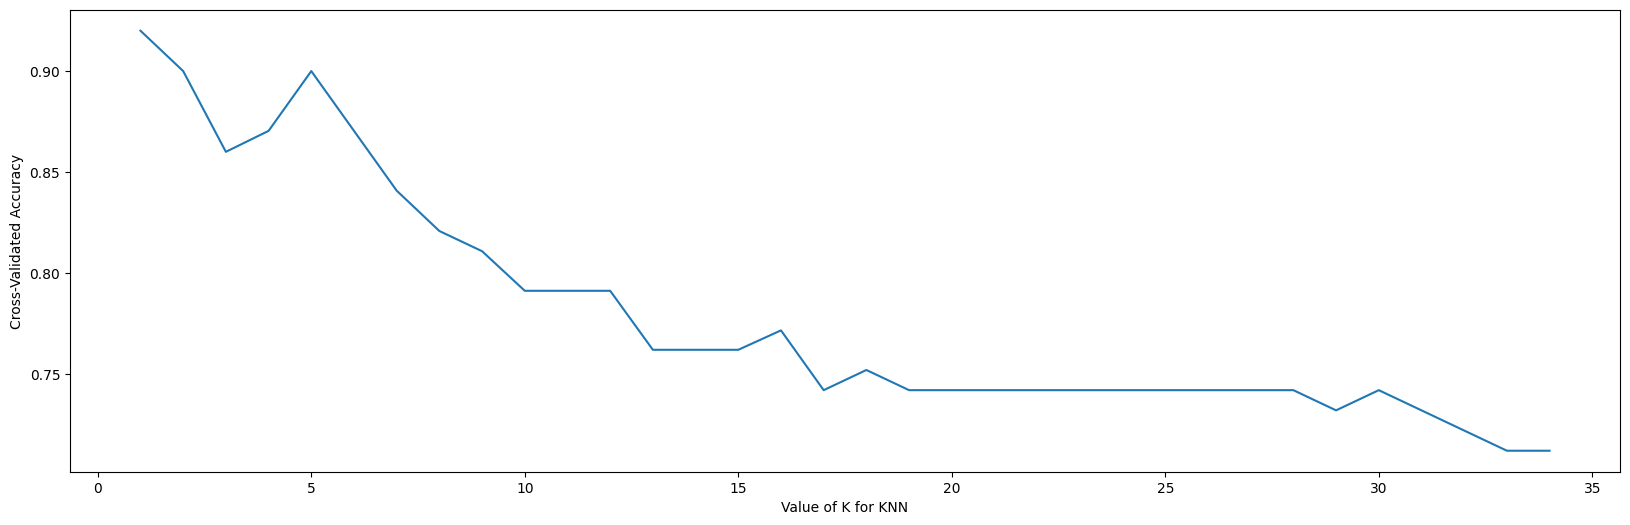

In [434]:
plt.figure(figsize=(20,6))
plt.plot(k_zoo_range, k_zoo_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [435]:
zoo_accuracy = pd.DataFrame({'Value of k' : k_zoo_range, 'Accuracy' : k_zoo_scores})
zoo_accuracy.head()

,Value of k,Accuracy
0,1,0.920000
1,2,0.900000
2,3,0.860000
3,4,0.870385
4,5,0.900000


In [436]:
zoo_accuracy.sort_values('Accuracy', ascending = False).head()

# Based on this we can see that the k values are highest for k = 2 and k = 5, if we ignore k = 1 (for being too small a value)

,Value of k,Accuracy
0,1,0.920000
1,2,0.900000
4,5,0.900000
3,4,0.870385
5,6,0.870385


In [437]:
knn_zoo_model_final = KNeighborsClassifier(n_neighbors = 5)
knn_zoo_model_final.fit(x_train_zoo,y_train_zoo)

KNeighborsClassifier()

In [438]:
knn_zoo_model_final.predict([[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1], [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0], [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 4, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 6, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 8, 1, 0, 0]])

array([1, 0, 0, 1, 0, 0, 0], dtype=int64)

- The first data set is predicted to have a value of 1
- The second data set is predicted to have a value of 0
- The third data set is predicted to have a value of 0
- The fourth data set is predicted to have a value of 1
- The fifth data set is predicted to have a value of 0
- The sixth data set is predicted to have a value of 0
- The seventh data set is predicted to have a value of 0